# Data Engineering Project
## Data Analyzers
### Islam Nasr
### Gaser Khaled
### Kariman Hossam
### Marwan Karim 

# 1) Working on the 250 Countries Dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# For min_max scaling
from sklearn.preprocessing import MinMaxScaler
import json

In [3]:
# Function to calculate the percentage of missing values in a given df
def calculate_missingdata_pct(df):
    missingdata = pd.DataFrame(columns=['Category', 'Percentage'])
    for col in df.columns:
        percentage = 100*df[col].isna().sum()/df.shape[0]
        missingdata = missingdata.append({'Category' : col, 'Percentage' : percentage}, ignore_index=True)
    return missingdata

In [4]:
df_countryData = pd.read_csv('./data/250 Country Data.csv')
df_countryData.head(5)

Unnamed: 0            name   region        subregion  population  \
0           0     Afghanistan     Asia    Southern Asia    27657145   
1           1   Åland Islands   Europe  Northern Europe       28875   
2           2         Albania   Europe  Southern Europe     2886026   
3           3         Algeria   Africa  Northern Africa    40400000   
4           4  American Samoa  Oceania        Polynesia       57100   

        area  gini Real Growth Rating(%)   Literacy Rate(%)  \
0   652230.0  27.8     3.1% (2013 est.).  28.1% (2000 est.)   
1     1580.0   NaN                   NaN                NaN   
2    28748.0  34.5      .7% (2013 est.).  98.7% (2011 est.)   
3  2381741.0  35.3                 3.1%.                79%   
4      199.0   NaN                   3%.    97% (1980 est.)   

        Inflation(%)                                   Unemployement(%)  
0  6.8% (2013 est.).                                   35% (2008 est.).  
1                NaN                                                NaN  
2  1.7% (2013 est.).  16.9% official rate (2013 est.). Note: These a...  
3              3.9%.                                             10.3%.  
4                NaN                                                NaN

In [5]:
df_countryData.rename(columns={'name': 'Country'}, inplace=True)
df_countryData.drop('Unnamed: 0', inplace=True, axis=1)
df_countryData.columns

Index(['Country', 'region', 'subregion', 'population', 'area', 'gini',
       'Real Growth Rating(%)', 'Literacy Rate(%)', 'Inflation(%)',
       'Unemployement(%)'],
      dtype='object')

In [6]:
df_countryData.rename(columns={
    'region': 'Region',
    'subregion': 'Subregion',
    'population': 'Population',
    'area': 'Area',
    'gini': 'Gini',
    'Real Growth Rating(%)': 'Real Growth Rating',
    'Literacy Rate(%)': 'Literacy Rate',
    'Inflation(%)': 'Inflation',
    'Unemployement(%)': 'Unemployment'
    }, inplace=True)
df_countryData.columns

Index(['Country', 'Region', 'Subregion', 'Population', 'Area', 'Gini',
       'Real Growth Rating', 'Literacy Rate', 'Inflation', 'Unemployment'],
      dtype='object')

In [7]:
calculate_missingdata_pct(df_countryData)

Category  Percentage
0             Country         0.0
1              Region         0.8
2           Subregion         1.2
3          Population         0.0
4                Area         4.0
5                Gini        38.8
6  Real Growth Rating        31.6
7       Literacy Rate        29.6
8           Inflation        32.8
9        Unemployment        32.8

In [8]:
df_countryData.isna().sum()

Country                0
Region                 2
Subregion              3
Population             0
Area                  10
Gini                  97
Real Growth Rating    79
Literacy Rate         74
Inflation             82
Unemployment          82
dtype: int64

# 2) Working on the Happiness Datasets

In [9]:
df_happiness2015 = pd.read_csv('./data/Happiness_Dataset/2015.csv')
print(df_happiness2015.columns)
df_happiness2015.head(5)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [10]:
df_happiness2015.rename(columns={
    'Happiness Rank': 'Happiness_Rank',  
    'Happiness Score': 'Happiness_Score' , 
    'Standard Error': 'Standard_Error', 
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',  
    'Health (Life Expectancy)': 'Health_Life_Expectancy', 
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
    }, inplace=True)
df_happiness2015.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [11]:
df_happiness2016 = pd.read_csv('./data/Happiness_Dataset/2016.csv')
df_happiness2016.rename(columns={
    'Happiness Rank': 'Happiness_Rank',  
    'Happiness Score': 'Happiness_Score' ,
    'Lower Confidence Interval': 'Lower_Confidence_Interval', 
    'Upper Confidence Interval': 'Upper_Confidence_Interval', 
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',  
    'Health (Life Expectancy)': 'Health_Life_Expectancy', 
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
    }, inplace=True)
df_happiness2017 = pd.read_csv('./data/Happiness_Dataset/2017.csv')
df_happiness2017.rename(columns={
    'Happiness.Rank': 'Happiness_Rank',  
    'Happiness.Score': 'Happiness_Score' , 
    'Whisker.low': 'Lower_Confidence_Interval', 
    'Whisker.high': 'Upper_Confidence_Interval', 
    'Economy..GDP.per.Capita.': 'Economy_GDP_per_Capita',  
    'Health..Life.Expectancy.': 'Health_Life_Expectancy', 
    'Trust..Government.Corruption.': 'Trust_Government_Corruption',
    'Dystopia.Residual': 'Dystopia_Residual'
    }, inplace=True)
df_happiness2018 = pd.read_csv('./data/Happiness_Dataset/2018.csv')
df_happiness2018.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region':'Country',  
    'Score': 'Happiness_Score' , 
    'GDP per capita': 'Economy_GDP_per_Capita',  
    'Healthy life expectancy': 'Health_Life_Expectancy',
    'Freedom to make life choices':'Freedom', 
    'Perceptions of corruption': 'Trust_Government_Corruption',
    'Social support':'Family'
    }, inplace=True)
df_happiness2019 = pd.read_csv('./data/Happiness_Dataset/2015.csv')
df_happiness2019.rename(columns={
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score' ,
    'Standard Error':'Standard_Error', 
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',  
    'Health (Life Expectancy)': 'Health_Life_Expectancy', 
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
    }, inplace=True)

In [12]:
countriesIn2015 = df_happiness2015['Country'].unique()
countriesIn2016 = df_happiness2016['Country'].unique()
countriesIn2017 = df_happiness2017['Country'].unique()
countriesIn2018 = df_happiness2018['Country'].unique()
countriesIn2019 = df_happiness2019['Country'].unique()
print('Count of countries in 2015:', len(countriesIn2015))
print('Count of countries in 2016:', len(countriesIn2016))
print('Count of countries in 2017:', len(countriesIn2017))
print('Count of countries in 2018:', len(countriesIn2018))
print('Count of countries in 2019:', len(countriesIn2019))

Count of countries in 2015: 158
Count of countries in 2016: 157
Count of countries in 2017: 155
Count of countries in 2018: 156
Count of countries in 2019: 158


In [13]:
df_happiness2015["Year"] = 2015
df_happiness2016["Year"] = 2016
df_happiness2017["Year"] = 2017
df_happiness2018["Year"] = 2018
df_happiness2019["Year"] = 2019
df_happiness = pd.concat([df_happiness2015, df_happiness2016, df_happiness2017, df_happiness2018, df_happiness2019])
df_happiness.sort_values(by=['Country','Year'], inplace=True)
df_happiness

Country              Region  Happiness_Rank  Happiness_Score  \
152  Afghanistan       Southern Asia             153            3.575   
153  Afghanistan       Southern Asia             154            3.360   
140  Afghanistan                 NaN             141            3.794   
144  Afghanistan                 NaN             145            3.632   
152  Afghanistan       Southern Asia             153            3.575   
..           ...                 ...             ...              ...   
114     Zimbabwe  Sub-Saharan Africa             115            4.610   
130     Zimbabwe  Sub-Saharan Africa             131            4.193   
137     Zimbabwe                 NaN             138            3.875   
143     Zimbabwe                 NaN             144            3.692   
114     Zimbabwe  Sub-Saharan Africa             115            4.610   

     Standard_Error  Economy_GDP_per_Capita    Family  Health_Life_Expectancy  \
152         0.03084                0.319820  0.302850                0.303350   
153             NaN                0.382270  0.110370                0.173440   
140             NaN                0.401477  0.581543                0.180747   
144             NaN                0.332000  0.537000                0.255000   
152         0.03084                0.319820  0.302850                0.303350   
..              ...                     ...       ...                     ...   
114         0.04290                0.271000  1.032760                0.334750   
130             NaN                0.350410  0.714780                0.159500   
137             NaN                0.375847  1.083096                0.196764   
143             NaN                0.357000  1.094000                0.248000   
114         0.04290                0.271000  1.032760                0.334750   

      Freedom  Trust_Government_Corruption  Generosity  Dystopia_Residual  \
152  0.234140                     0.097190    0.365100           1.952100   
153  0.164300                     0.071120    0.312680           2.145580   
140  0.106180                     0.061158    0.311871           2.150801   
144  0.085000                     0.036000    0.191000                NaN   
152  0.234140                     0.097190    0.365100           1.952100   
..        ...                          ...         ...                ...   
114  0.258610                     0.080790    0.189870           2.441910   
130  0.254290                     0.085820    0.185030           2.442700   
137  0.336384                     0.095375    0.189143           1.597970   
143  0.406000                     0.099000    0.132000                NaN   
114  0.258610                     0.080790    0.189870           2.441910   

     Year  Lower_Confidence_Interval  Upper_Confidence_Interval  
152  2015                        NaN                        NaN  
153  2016                   3.288000                   3.432000  
140  2017                   3.714338                   3.873661  
144  2018                        NaN                        NaN  
152  2019                        NaN                        NaN  
..    ...                        ...                        ...  
114  2015                        NaN                        NaN  
130  2016                   4.101000                   4.285000  
137  2017                   3.771300                   3.978700  
143  2018                        NaN                        NaN  
114  2019                        NaN                        NaN  

[784 rows x 15 columns]

### Checking to see if the data has NaN values.

In [14]:
calculate_missingdata_pct(df_happiness)

Category  Percentage
0                       Country    0.000000
1                        Region   39.668367
2                Happiness_Rank    0.000000
3               Happiness_Score    0.000000
4                Standard_Error   59.693878
5        Economy_GDP_per_Capita    0.000000
6                        Family    0.000000
7        Health_Life_Expectancy    0.000000
8                       Freedom    0.000000
9   Trust_Government_Corruption    0.127551
10                   Generosity    0.000000
11            Dystopia_Residual   19.897959
12                         Year    0.000000
13    Lower_Confidence_Interval   60.204082
14    Upper_Confidence_Interval   60.204082

In [15]:
df_happiness.isna().sum()

Country                          0
Region                         311
Happiness_Rank                   0
Happiness_Score                  0
Standard_Error                 468
Economy_GDP_per_Capita           0
Family                           0
Health_Life_Expectancy           0
Freedom                          0
Trust_Government_Corruption      1
Generosity                       0
Dystopia_Residual              156
Year                             0
Lower_Confidence_Interval      472
Upper_Confidence_Interval      472
dtype: int64

### Changing the names of some countries with inconsitent names in all years.

In [16]:
df_happiness['Country'] = df_happiness['Country'].replace({'&':'and'},regex=True)
df_happiness['Country'] = df_happiness['Country'].replace({
    'Northern Cyprus': 'North Cyprus',
    'Somaliland region': 'Somaliland Region',
    'Taiwan Province of China': 'Taiwan',
    'Hong Kong S.A.R., China': 'Hong Kong'
    })

### Finding the common columns in all the tables of the happiness dataset.

In [17]:
columnsIn2015Happiness = np.array(df_happiness2015.columns)
columnsIn2016Happiness = np.array(df_happiness2016.columns)
columnsIn2017Happiness = np.array(df_happiness2017.columns)
columnsIn2018Happiness = np.array(df_happiness2018.columns)
columnsIn2019Happiness = np.array(df_happiness2019.columns)

columnsInAllHappinessDatasets = np.intersect1d(
    np.intersect1d(
        np.intersect1d(
            np.intersect1d(
                columnsIn2015Happiness,
                columnsIn2016Happiness
                ),
                    columnsIn2017Happiness
                    ),
                        columnsIn2018Happiness
                        ),
                            columnsIn2019Happiness
                            )
print(columnsInAllHappinessDatasets)

['Country' 'Economy_GDP_per_Capita' 'Family' 'Freedom' 'Generosity'
 'Happiness_Rank' 'Happiness_Score' 'Health_Life_Expectancy'
 'Trust_Government_Corruption' 'Year']


### Removing the uncommon columns.


In [18]:
df_happiness = df_happiness[columnsInAllHappinessDatasets]

### Investigating whether all countries have records in all the 5 years.

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_happiness.groupby('Country').Country.count())

Country
Afghanistan                 5
Albania                     5
Algeria                     5
Angola                      5
Argentina                   5
Armenia                     5
Australia                   5
Austria                     5
Azerbaijan                  5
Bahrain                     5
Bangladesh                  5
Belarus                     5
Belgium                     5
Belize                      3
Benin                       5
Bhutan                      5
Bolivia                     5
Bosnia and Herzegovina      5
Botswana                    5
Brazil                      5
Bulgaria                    5
Burkina Faso                5
Burundi                     5
Cambodia                    5
Cameroon                    5
Canada                      5
Central African Republic    4
Chad                        5
Chile                       5
China                       5
Colombia                    5
Comoros                     3
Congo (Brazzaville)         5
Co

### Dropping the countries that do not have records for all 5 years.

In [20]:
def countriesWithoutXRecords(df, countries, c):
    result = []
    for country in countries:
        count = df[df['Country'] == country]['Country'].count()
        if count < c:
            result.append(country)
    return result

countries = df_happiness.groupby('Country').groups.keys()

countriesWithout5Records = countriesWithoutXRecords(df_happiness, countries, 5)
print('Number of countries to drop:', len(countriesWithout5Records))
print('Number of countries that exist:', len(countries))

df_happiness = df_happiness.loc[(~df_happiness['Country'].isin(countriesWithout5Records)), :]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_happiness.groupby('Country').Country.count())
print('The new length of dataframe after dropping countries with records for less than 5 years:', len(df_happiness))

Number of countries to drop: 15
Number of countries that exist: 163
Country
Afghanistan                5
Albania                    5
Algeria                    5
Angola                     5
Argentina                  5
Armenia                    5
Australia                  5
Austria                    5
Azerbaijan                 5
Bahrain                    5
Bangladesh                 5
Belarus                    5
Belgium                    5
Benin                      5
Bhutan                     5
Bolivia                    5
Bosnia and Herzegovina     5
Botswana                   5
Brazil                     5
Bulgaria                   5
Burkina Faso               5
Burundi                    5
Cambodia                   5
Cameroon                   5
Canada                     5
Chad                       5
Chile                      5
China                      5
Colombia                   5
Congo (Brazzaville)        5
Congo (Kinshasa)           5
Costa Rica               

### Checking the data now to see if there is NaN values.

In [21]:
df_happiness.isna().sum()

Country                        0
Economy_GDP_per_Capita         0
Family                         0
Freedom                        0
Generosity                     0
Happiness_Rank                 0
Happiness_Score                0
Health_Life_Expectancy         0
Trust_Government_Corruption    1
Year                           0
dtype: int64

<h1> 3) Working on the life expectancy data set. </h1>

In [22]:
df_lifeExpectancy = pd.read_csv('./data/Life Expectancy Data.csv')
df_lifeExpectancy.set_index(['Country', 'Year'])
df_lifeExpectancy.head(16)

Country  Year      Status  Life expectancy   Adult Mortality  \
0   Afghanistan  2015  Developing              65.0            263.0   
1   Afghanistan  2014  Developing              59.9            271.0   
2   Afghanistan  2013  Developing              59.9            268.0   
3   Afghanistan  2012  Developing              59.5            272.0   
4   Afghanistan  2011  Developing              59.2            275.0   
5   Afghanistan  2010  Developing              58.8            279.0   
6   Afghanistan  2009  Developing              58.6            281.0   
7   Afghanistan  2008  Developing              58.1            287.0   
8   Afghanistan  2007  Developing              57.5            295.0   
9   Afghanistan  2006  Developing              57.3            295.0   
10  Afghanistan  2005  Developing              57.3            291.0   
11  Afghanistan  2004  Developing              57.0            293.0   
12  Afghanistan  2003  Developing              56.7            295.0   
13  Afghanistan  2002  Developing              56.2              3.0   
14  Afghanistan  2001  Developing              55.3            316.0   
15  Afghanistan  2000  Developing              54.8            321.0   

    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0              62     0.01               71.279624         65.0      1154   
1              64     0.01               73.523582         62.0       492   
2              66     0.01               73.219243         64.0       430   
3              69     0.01               78.184215         67.0      2787   
4              71     0.01                7.097109         68.0      3013   
5              74     0.01               79.679367         66.0      1989   
6              77     0.01               56.762217         63.0      2861   
7              80     0.03               25.873925         64.0      1599   
8              82     0.02               10.910156         63.0      1141   
9              84     0.03               17.171518         64.0      1990   
10             85     0.02                1.388648         66.0      1296   
11             87     0.02               15.296066         67.0       466   
12             87     0.01               11.089053         65.0       798   
13             88     0.01               16.887351         64.0      2486   
14             88     0.01               10.574728         63.0      8762   
15             88     0.01               10.424960         62.0      6532   

    ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0   ...    6.0               8.16         65.0        0.1  584.259210   
1   ...   58.0               8.18         62.0        0.1  612.696514   
2   ...   62.0               8.13         64.0        0.1  631.744976   
3   ...   67.0               8.52         67.0        0.1  669.959000   
4   ...   68.0               7.87         68.0        0.1   63.537231   
5   ...   66.0               9.20         66.0        0.1  553.328940   
6   ...   63.0               9.42         63.0        0.1  445.893298   
7   ...   64.0               8.33         64.0        0.1  373.361116   
8   ...   63.0               6.73         63.0        0.1  369.835796   
9   ...   58.0               7.43         58.0        0.1  272.563770   
10  ...   58.0               8.70         58.0        0.1   25.294130   
11  ...    5.0               8.79          5.0        0.1  219.141353   
12  ...   41.0               8.82         41.0        0.1  198.728544   
13  ...   36.0               7.76         36.0        0.1  187.845950   
14  ...   35.0               7.80         33.0        0.1  117.496980   
15  ...   24.0               8.20         24.0        0.1  114.560000   

    Population   thinness  1-19 years   thinness 5-9 years  \
0   33736494.0                   17.2                 17.3   
1     327582.0                   17.5                 17.5   
2   31731688.0                   17.7        

In [23]:
df_lifeExpectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [24]:
# Removing the trailing spaces in the column names.
df_lifeExpectancy.rename(columns=lambda x: x.strip(), inplace=True)
df_lifeExpectancy.columns = [name.capitalize() for name in df_lifeExpectancy.columns]
df_lifeExpectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis b',
       'Measles', 'Bmi', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'Hiv/aids', 'Gdp', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [25]:
df_lifeExpectancy.rename(columns = {
    'Life expectancy': 'Life_Expectancy',
    'Adult mortality': 'Adult_Mortality',
    'Infant deaths': 'Infant_Deaths',
    'Percentage expenditure': 'Percentage_Expenditure',
    'Hepatitis b': 'Hepatitis_B',
    'Bmi': 'BMI',
    'Under-five deaths': 'Under-five_Deaths',
    'Total expenditure': 'Total_Expenditure',
    'Hiv/aids': 'HIV/AIDS',
    'Gdp': 'GDP',
    'Thinness  1-19 years': 'Thinness_10-19_Years',
    'Thinness 5-9 years': 'Thinness_5-9_Years',
    'Income composition of resources': 'Income_Composition_of_Resources'
}, inplace=True)
df_lifeExpectancy.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under-five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_10-19_Years',
       'Thinness_5-9_Years', 'Income_Composition_of_Resources', 'Schooling'],
      dtype='object')

In [26]:
df_lifeExpectancy.head(10)

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   
5  Afghanistan  2010  Developing             58.8            279.0   
6  Afghanistan  2009  Developing             58.6            281.0   
7  Afghanistan  2008  Developing             58.1            287.0   
8  Afghanistan  2007  Developing             57.5            295.0   
9  Afghanistan  2006  Developing             57.3            295.0   

   Infant_Deaths  Alcohol  Percentage_Expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   
5             74     0.01               79.679367         66.0     1989  ...   
6             77     0.01               56.762217         63.0     2861  ...   
7             80     0.03               25.873925         64.0     1599  ...   
8             82     0.02               10.910156         63.0     1141  ...   
9             84     0.03               17.171518         64.0     1990  ...   

   Polio  Total_Expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   
5   66.0               9.20        66.0       0.1  553.328940   2883167.0   
6   63.0               9.42        63.0       0.1  445.893298    284331.0   
7   64.0               8.33        64.0       0.1  373.361116   2729431.0   
8   63.0               6.73        63.0       0.1  369.835796  26616792.0   
9   58.0               7.43        58.0       0.1  272.563770   2589345.0   

   Thinness_10-19_Years  Thinness_5-9_Years  Income_Composition_of_Resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   
5                  18.4                18.4                            0.448   
6                  18.6                18.7                            0.434   
7                  18.8                18.9                            0.433   
8                  19.0                19.1                            0.415   
9                  19.2                19.3                            0.405   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  
5        9.2  
6        8.9  
7        8.7  
8        8.4  
9        8.1  

[10 rows x 22 columns]

### Exploring the NaN values of the life expectancy dataset.

In [27]:
calculate_missingdata_pct(df_lifeExpectancy)

Category  Percentage
0                           Country    0.000000
1                              Year    0.000000
2                            Status    0.000000
3                   Life_Expectancy    0.340368
4                   Adult_Mortality    0.340368
5                     Infant_Deaths    0.000000
6                           Alcohol    6.603131
7            Percentage_Expenditure    0.000000
8                       Hepatitis_B   18.822328
9                           Measles    0.000000
10                              BMI    1.157250
11                Under-five_Deaths    0.000000
12                            Polio    0.646698
13                Total_Expenditure    7.692308
14                       Diphtheria    0.646698
15                         HIV/AIDS    0.000000
16                              GDP   15.248468
17                       Population   22.191967
18             Thinness_10-19_Years    1.157250
19               Thinness_5-9_Years    1.157250
20  Income_Composition_of_Resources    5.684139
21                        Schooling    5.547992

In [28]:
df_lifeExpectancy.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
Infant_Deaths                        0
Alcohol                            194
Percentage_Expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
Under-five_Deaths                    0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_10-19_Years                34
Thinness_5-9_Years                  34
Income_Composition_of_Resources    167
Schooling                          163
dtype: int64

### Removing the countries that don't have records for all 16 years. This is done in order to help us with the predicitons to follow.

In [29]:
countriesInLifeExpectancy = df_lifeExpectancy.groupby('Country').groups.keys()

countriesWithout16Records = countriesWithoutXRecords(df_lifeExpectancy, countriesInLifeExpectancy, 16)
print('Number of countries to drop:', len(countriesWithout16Records))
print('Number of countries that exist:', len(countriesInLifeExpectancy))

df_lifeExpectancy = df_lifeExpectancy.loc[(~df_lifeExpectancy['Country'].isin(countriesWithout16Records)), :]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_lifeExpectancy.groupby('Country').Country.count())
print('The new length of dataframe after dropping countries with records for less than 16 years:', len(df_lifeExpectancy))

                     16
Belize                                                  16
Benin                                                   16
Bhutan                                                  16
Bolivia (Plurinational State of)                        16
Bosnia and Herzegovina                                  16
Botswana                                                16
Brazil                                                  16
Brunei Darussalam                                       16
Bulgaria                                                16
Burkina Faso                                            16
Burundi                                                 16
Cabo Verde                                              16
Cambodia                                                16
Cameroon                                                16
Canada                                                  16
Central African Republic                                16
Chad                            

### We will only keep these columns: Status, Life expectancy, Adult mortality, Infant deaths, Measles, Polio, Diphtheria, HIV/AIDS, Thinness BOTH, Income composition, Schooling as they are the ones concerned with our research questions.

In [30]:
df_lifeExpectancy = df_lifeExpectancy[['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Thinness_5-9_Years', 'Thinness_10-19_Years']]
df_lifeExpectancy.head(10)

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   
5  Afghanistan  2010  Developing             58.8            279.0   
6  Afghanistan  2009  Developing             58.6            281.0   
7  Afghanistan  2008  Developing             58.1            287.0   
8  Afghanistan  2007  Developing             57.5            295.0   
9  Afghanistan  2006  Developing             57.3            295.0   

   Infant_Deaths  Measles  Polio  Diphtheria  HIV/AIDS  Thinness_5-9_Years  \
0             62     1154    6.0        65.0       0.1                17.3   
1             64      492   58.0        62.0       0.1                17.5   
2             66      430   62.0        64.0       0.1                17.7   
3             69     2787   67.0        67.0       0.1                18.0   
4             71     3013   68.0        68.0       0.1                18.2   
5             74     1989   66.0        66.0       0.1                18.4   
6             77     2861   63.0        63.0       0.1                18.7   
7             80     1599   64.0        64.0       0.1                18.9   
8             82     1141   63.0        63.0       0.1                19.1   
9             84     1990   58.0        58.0       0.1                19.3   

   Thinness_10-19_Years  
0                  17.2  
1                  17.5  
2                  17.7  
3                  17.9  
4                  18.2  
5                  18.4  
6                  18.6  
7                  18.8  
8                  19.0  
9                  19.2

Heatmap showing the correlation between every attribute.


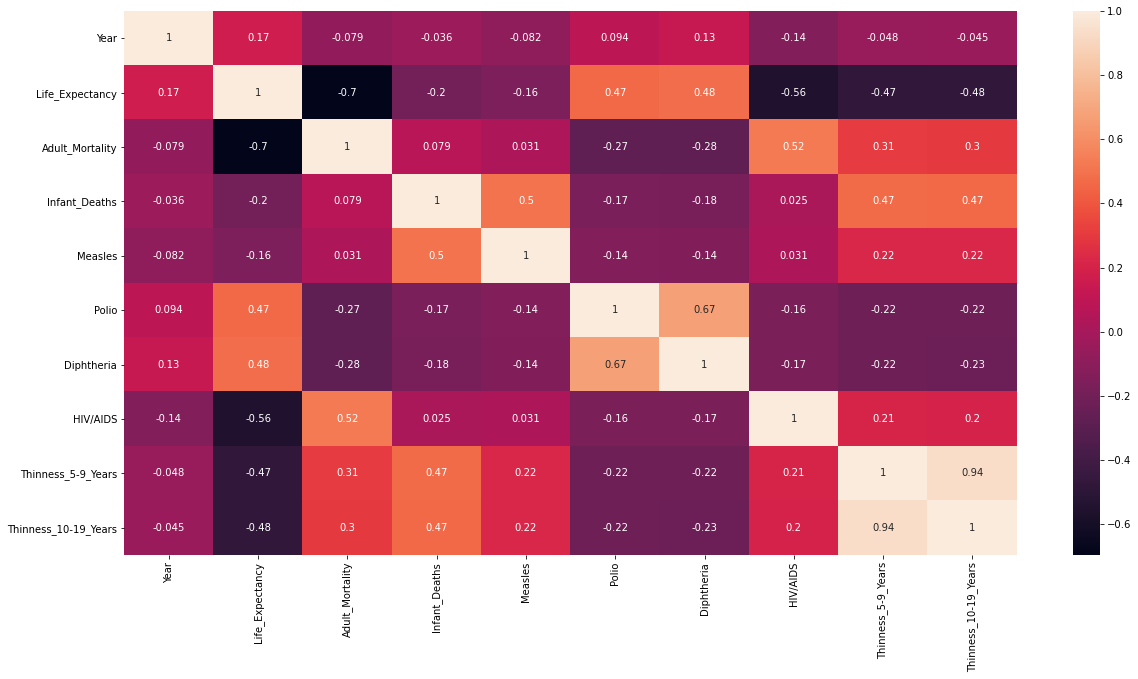

In [31]:
plt.figure(figsize=(20, 10))
print('Heatmap showing the correlation between every attribute.')
sns.heatmap(df_lifeExpectancy.corr(), annot=True)
plt.show()

### Visualising all the attributes of 3 different countries over the years.

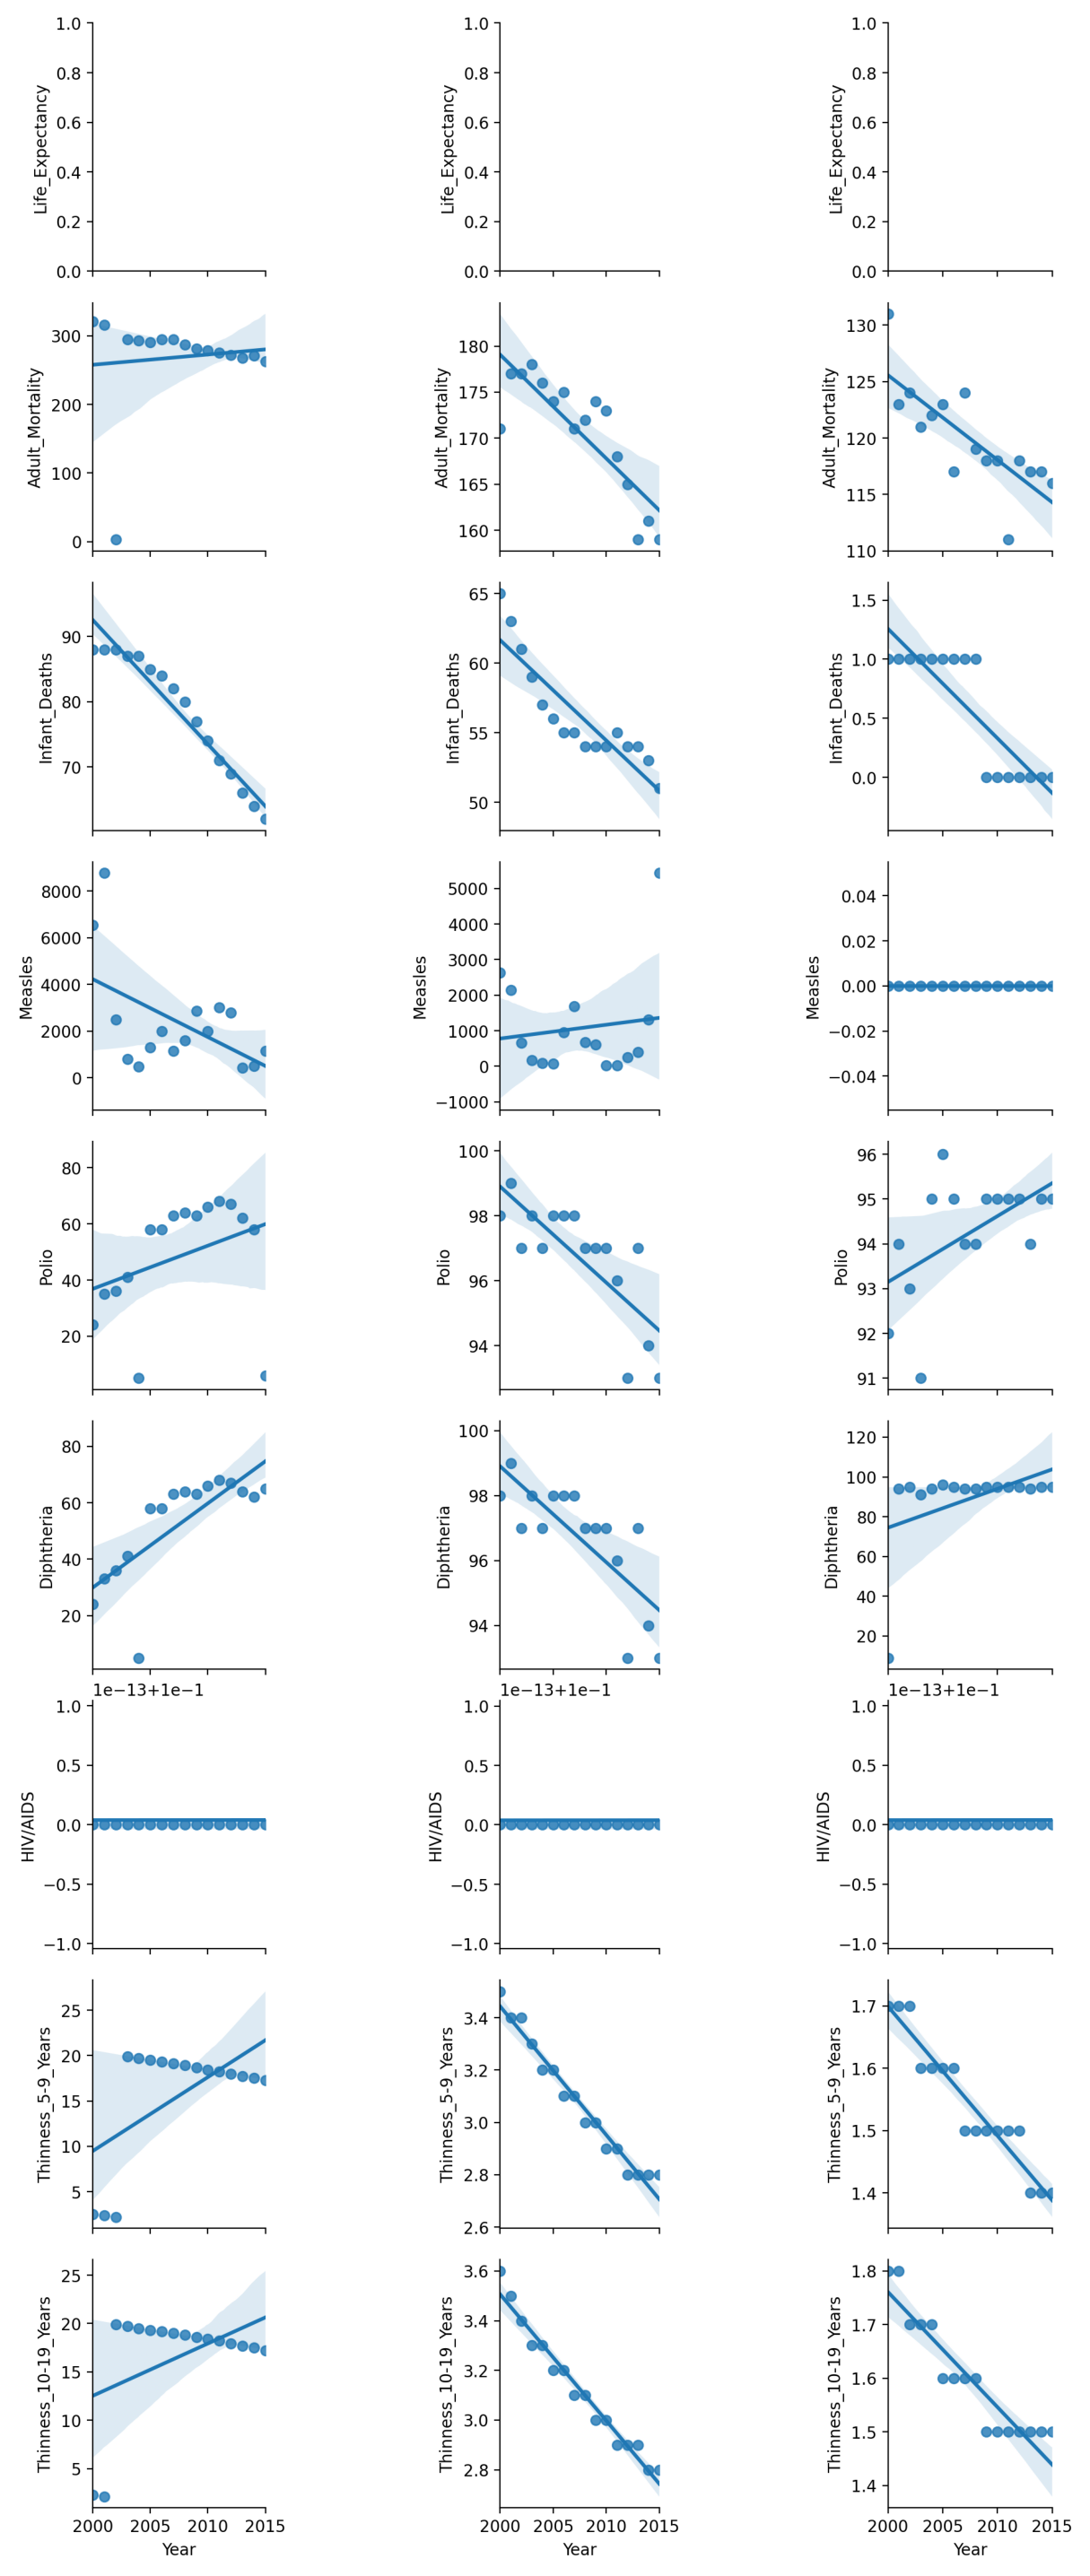

In [32]:
countryAfghanistan = df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Afghanistan']
#sns.pairplot(data=countryAfghanistan, hue="Country", x_vars='Year', kind='reg', y_vars=countryAfghanistan.columns[3:])

countryEgypt = df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Egypt']
#sns.pairplot(data=countryMozambique, hue="Country", x_vars='Year', kind='reg', y_vars=countryMozambique.columns[3:])

countryUruguay = df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Uruguay']
#sns.pairplot(data=countryUruguay, hue="Country", x_vars='Year', kind='reg', y_vars=countryUruguay.columns[3:])

def pairplot(data, x_vars, y_vars):
    return sns.pairplot(data=data, x_vars=x_vars, y_vars=y_vars, kind='reg')

g0 = pairplot(countryAfghanistan, 'Year', countryAfghanistan.columns[3:])
g1 = pairplot(countryEgypt, 'Year', countryEgypt.columns[3:])
g2 = pairplot(countryUruguay, 'Year', countryUruguay.columns[3:])

g0.savefig('g0.png', dpi=200)
plt.close(g0.fig)

g1.savefig('g1.png', dpi=200)
plt.close(g1.fig)

g2.savefig('g2.png', dpi=200)
plt.close(g2.fig)

f, axarr = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))
plt.subplots_adjust(wspace=0.05, hspace=0)
axarr[0].imshow(mpimg.imread('g0.png'))
axarr[1].imshow(mpimg.imread('g1.png'))
axarr[2].imshow(mpimg.imread('g2.png'))

[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout()
plt.show()

## Imputing the missing data values in the Life Expectancy dataset.

### The missing values of Polio, Diphtheria and both Thinness are less than 1%, meaning we could impute them using the mean, based on the Status of the country.

In [33]:
# Function to calculate the mean of *col* in a dataframe based on a condition passed along in the *compareCol* and *compareTo*.
def calculateMean(df, compareCol, compareTo, col):
    return df[df[compareCol] == compareTo][col].mean()
#
#  Function to replace values with *valueToReplace* in a dataframe based on a condition on the *compareCol* using a *compareTo* value in a specific *col*.
def replaceNaN(df, compareCol, compareTo, col, valueToReplace):
    df[col] = df.apply(lambda row: valueToReplace if (np.isnan(row[col]) and row[compareCol] == compareTo) else row[col], axis=1)

In [34]:
averageOfDevelopedPolio = calculateMean(df_lifeExpectancy, 'Status', 'Developed', 'Polio')
averageOfDevelopingPolio = calculateMean(df_lifeExpectancy, 'Status', 'Developing', 'Polio')

averageOfDevelopedDiph = calculateMean(df_lifeExpectancy, 'Status', 'Developed', 'Diphtheria')
averageOfDevelopingDiph = calculateMean(df_lifeExpectancy, 'Status', 'Developing', 'Diphtheria')

averageOfDevelopedThinness = calculateMean(df_lifeExpectancy, 'Status', 'Developed', 'Thinness_5-9_Years')
averageOfDevelopingThinness = calculateMean(df_lifeExpectancy, 'Status', 'Developing', 'Thinness_5-9_Years')

averageOfDevelopedThinness2 = calculateMean(df_lifeExpectancy, 'Status', 'Developed', 'Thinness_10-19_Years')
averageOfDevelopingThinness2 = calculateMean(df_lifeExpectancy, 'Status', 'Developing', 'Thinness_10-19_Years')

print('Mean polio value of developed:', averageOfDevelopedPolio)
print('Mean polio value of developing:', averageOfDevelopingPolio)

print('Mean diphtheria value of developed:', averageOfDevelopedDiph)
print('Mean diphtheria value of developing:', averageOfDevelopingDiph)

print('Mean thinness 5-9 value of developed:', averageOfDevelopedThinness)
print('Mean thinness 5-9 value of developing:', averageOfDevelopingThinness)

print('Mean thinness 10-19 value of developed:', averageOfDevelopedThinness2)
print('Mean thinness 10-19 value of developing:', averageOfDevelopingThinness2)

replaceNaN(df_lifeExpectancy, 'Status', 'Developed', 'Polio', averageOfDevelopedPolio)
replaceNaN(df_lifeExpectancy, 'Status', 'Developing', 'Polio', averageOfDevelopingPolio)

replaceNaN(df_lifeExpectancy, 'Status', 'Developed', 'Diphtheria', averageOfDevelopedDiph)
replaceNaN(df_lifeExpectancy, 'Status', 'Developing', 'Diphtheria', averageOfDevelopingDiph)

replaceNaN(df_lifeExpectancy, 'Status', 'Developed', 'Thinness_5-9_Years', averageOfDevelopedThinness)
replaceNaN(df_lifeExpectancy, 'Status', 'Developing', 'Thinness_5-9_Years', averageOfDevelopingThinness)

replaceNaN(df_lifeExpectancy, 'Status', 'Developed', 'Thinness_10-19_Years', averageOfDevelopedThinness2)
replaceNaN(df_lifeExpectancy, 'Status', 'Developing', 'Thinness_10-19_Years', averageOfDevelopingThinness2)

Mean polio value of developed: 93.736328125
Mean polio value of developing: 80.15853149770547
Mean diphtheria value of developed: 93.4765625
Mean diphtheria value of developing: 79.9386733416771
Mean thinness 5-9 value of developed: 1.2966796875
Mean thinness 5-9 value of developing: 5.65130033557047
Mean thinness 10-19 value of developed: 1.320703125
Mean thinness 10-19 value of developing: 5.608724832214765


#### Function to draw multiple box plots for given columns of a df.

In [35]:
def boxplot(df, col, ax, i):
    return sns.boxplot(x=df[col], ax=ax[i])

def drawMultipleBoxPlots(df, columns, xfigSize, yfigSize):
    f, axarr = plt.subplots(nrows=len(columns), ncols=1, figsize=(xfigSize, yfigSize))
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    i = 0
    for col in columns:
        boxplot(df, col, axarr, i)
        i += 1
    f.show()
    
def drawInterpolatedMultipleBoxPlots(df, df2, columns, xfigSize, yfigSize):
    f, axarr = plt.subplots(nrows=len(columns) * 2, ncols=1, figsize=(xfigSize, yfigSize))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    i = 0
    for col in columns:
        boxplot(df, col, axarr, i)
        i += 1
        boxplot(df2, col, axarr, i)
        i += 1
    f.show()

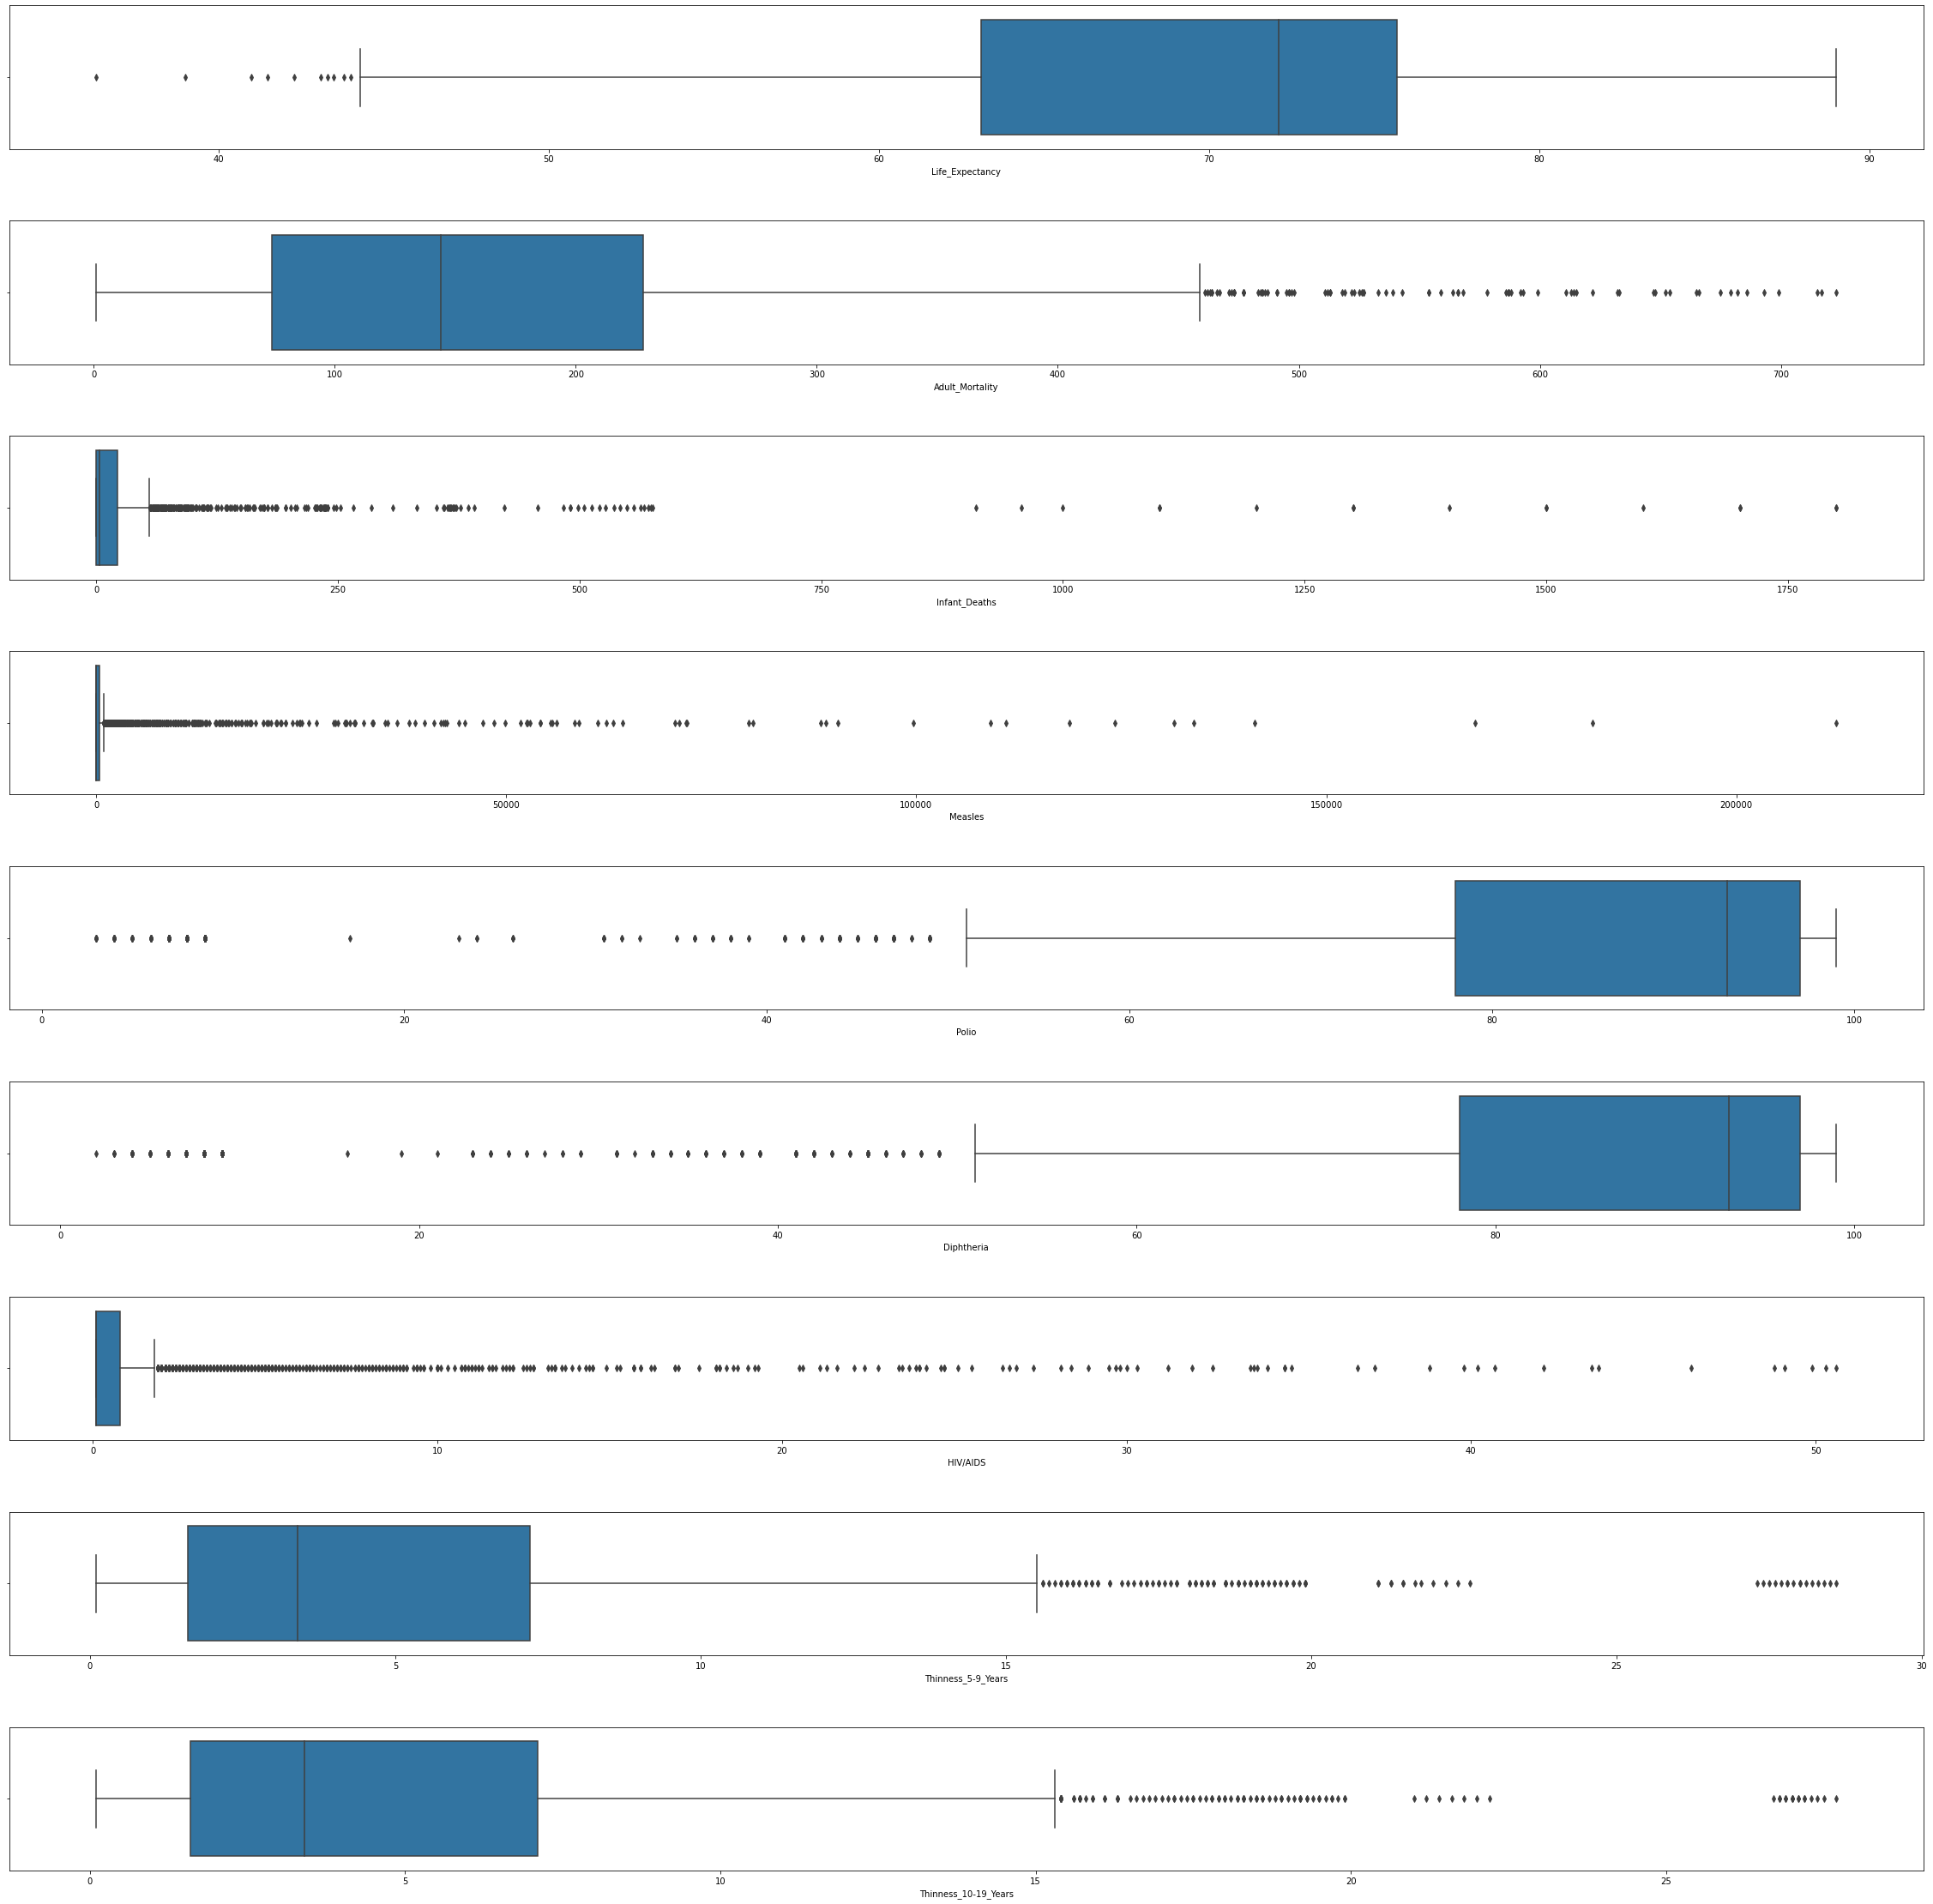

In [36]:
drawMultipleBoxPlots(df_lifeExpectancy, df_lifeExpectancy.columns[3:], 40, 40)

### Based on the above figure, we can see that there exists many values of Measles and Infant_Deaths that are more than 1000, even though the numerical values should be 1000 or below as per the column description. We will handle this by imputing any value that is higher than 1000 with the highest possible value of the box plot whisker (Q3 + IQR * 1.5).

In [37]:
Q1 = df_lifeExpectancy.quantile(0.25)
Q3 = df_lifeExpectancy.quantile(0.75)
IQR = Q3 - Q1
maxValueOfMeasles = (IQR['Measles'] * 1.5) + Q3['Measles']
maxValueOfInfantDeaths = (IQR['Infant_Deaths'] * 1.5) + Q3['Infant_Deaths']
print('The maximum value of measles cases possible per higher whisker:', maxValueOfMeasles)
print('The maximum value of infant deaths possible per higher whisker:', maxValueOfInfantDeaths)

maxValueSatisfyingConditionMeasles = df_lifeExpectancy[~(df_lifeExpectancy['Measles'] > maxValueOfMeasles)]['Measles'].max()
maxValueSatisfyingConditionInfantDeaths = df_lifeExpectancy[~(df_lifeExpectancy['Infant_Deaths'] > maxValueOfInfantDeaths)]['Infant_Deaths'].max()

print('The maximum value of measles that is less than or equal to the value of the higher whisker:', maxValueSatisfyingConditionMeasles)
print('The maximum value of infant deaths that is less than or equal to the value of the higher whisker:', maxValueSatisfyingConditionInfantDeaths)

# We will replace all values that mostly don't make sense using these conditional values.
def replace(df, col, valueToReplace):
    df[col] = df.apply(lambda row: valueToReplace if (row[col] >= valueToReplace) else row[col], axis=1)

replace(df_lifeExpectancy, 'Measles', maxValueSatisfyingConditionMeasles)
replace(df_lifeExpectancy, 'Infant_Deaths', maxValueSatisfyingConditionInfantDeaths)

The maximum value of measles cases possible per higher whisker: 905.625
The maximum value of infant deaths possible per higher whisker: 55.0
The maximum value of measles that is less than or equal to the value of the higher whisker: 899
The maximum value of infant deaths that is less than or equal to the value of the higher whisker: 55


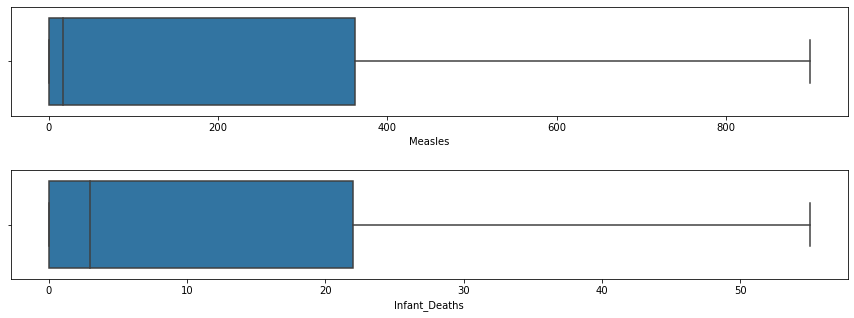

In [38]:
drawMultipleBoxPlots(df_lifeExpectancy, ['Measles', 'Infant_Deaths'], 15, 5)

In [39]:
df_lifeExpectancy.describe()

Year  Life_Expectancy  Adult_Mortality  Infant_Deaths  \
count  2928.00000      2928.000000      2928.000000    2928.000000   
mean   2007.50000        69.224932       164.796448      13.681694   
std       4.61056         9.523867       124.292079      19.124887   
min    2000.00000        36.300000         1.000000       0.000000   
25%    2003.75000        63.100000        74.000000       0.000000   
50%    2007.50000        72.100000       144.000000       3.000000   
75%    2011.25000        75.700000       228.000000      22.000000   
max    2015.00000        89.000000       723.000000      55.000000   

           Measles        Polio   Diphtheria     HIV/AIDS  Thinness_5-9_Years  \
count  2928.000000  2928.000000  2928.000000  2928.000000         2928.000000   
mean    234.243169    82.532791    82.305955     1.747712            4.889837   
std     353.385411    23.341337    23.630350     5.085542            4.485605   
min       0.000000     3.000000     2.000000     0.100000            0.100000   
25%       0.000000    78.000000    78.000000     0.100000            1.600000   
50%      17.000000    93.000000    93.000000     0.100000            3.400000   
75%     362.250000    97.000000    97.000000     0.800000            7.200000   
max     899.000000    99.000000    99.000000    50.600000           28.600000   

       Thinness_10-19_Years  
count           2928.000000  
mean               4.858907  
std                4.397304  
min                0.100000  
25%                1.600000  
50%                3.400000  
75%                7.100000  
max               27.700000

### Removing the outliers from all columns using the mean.

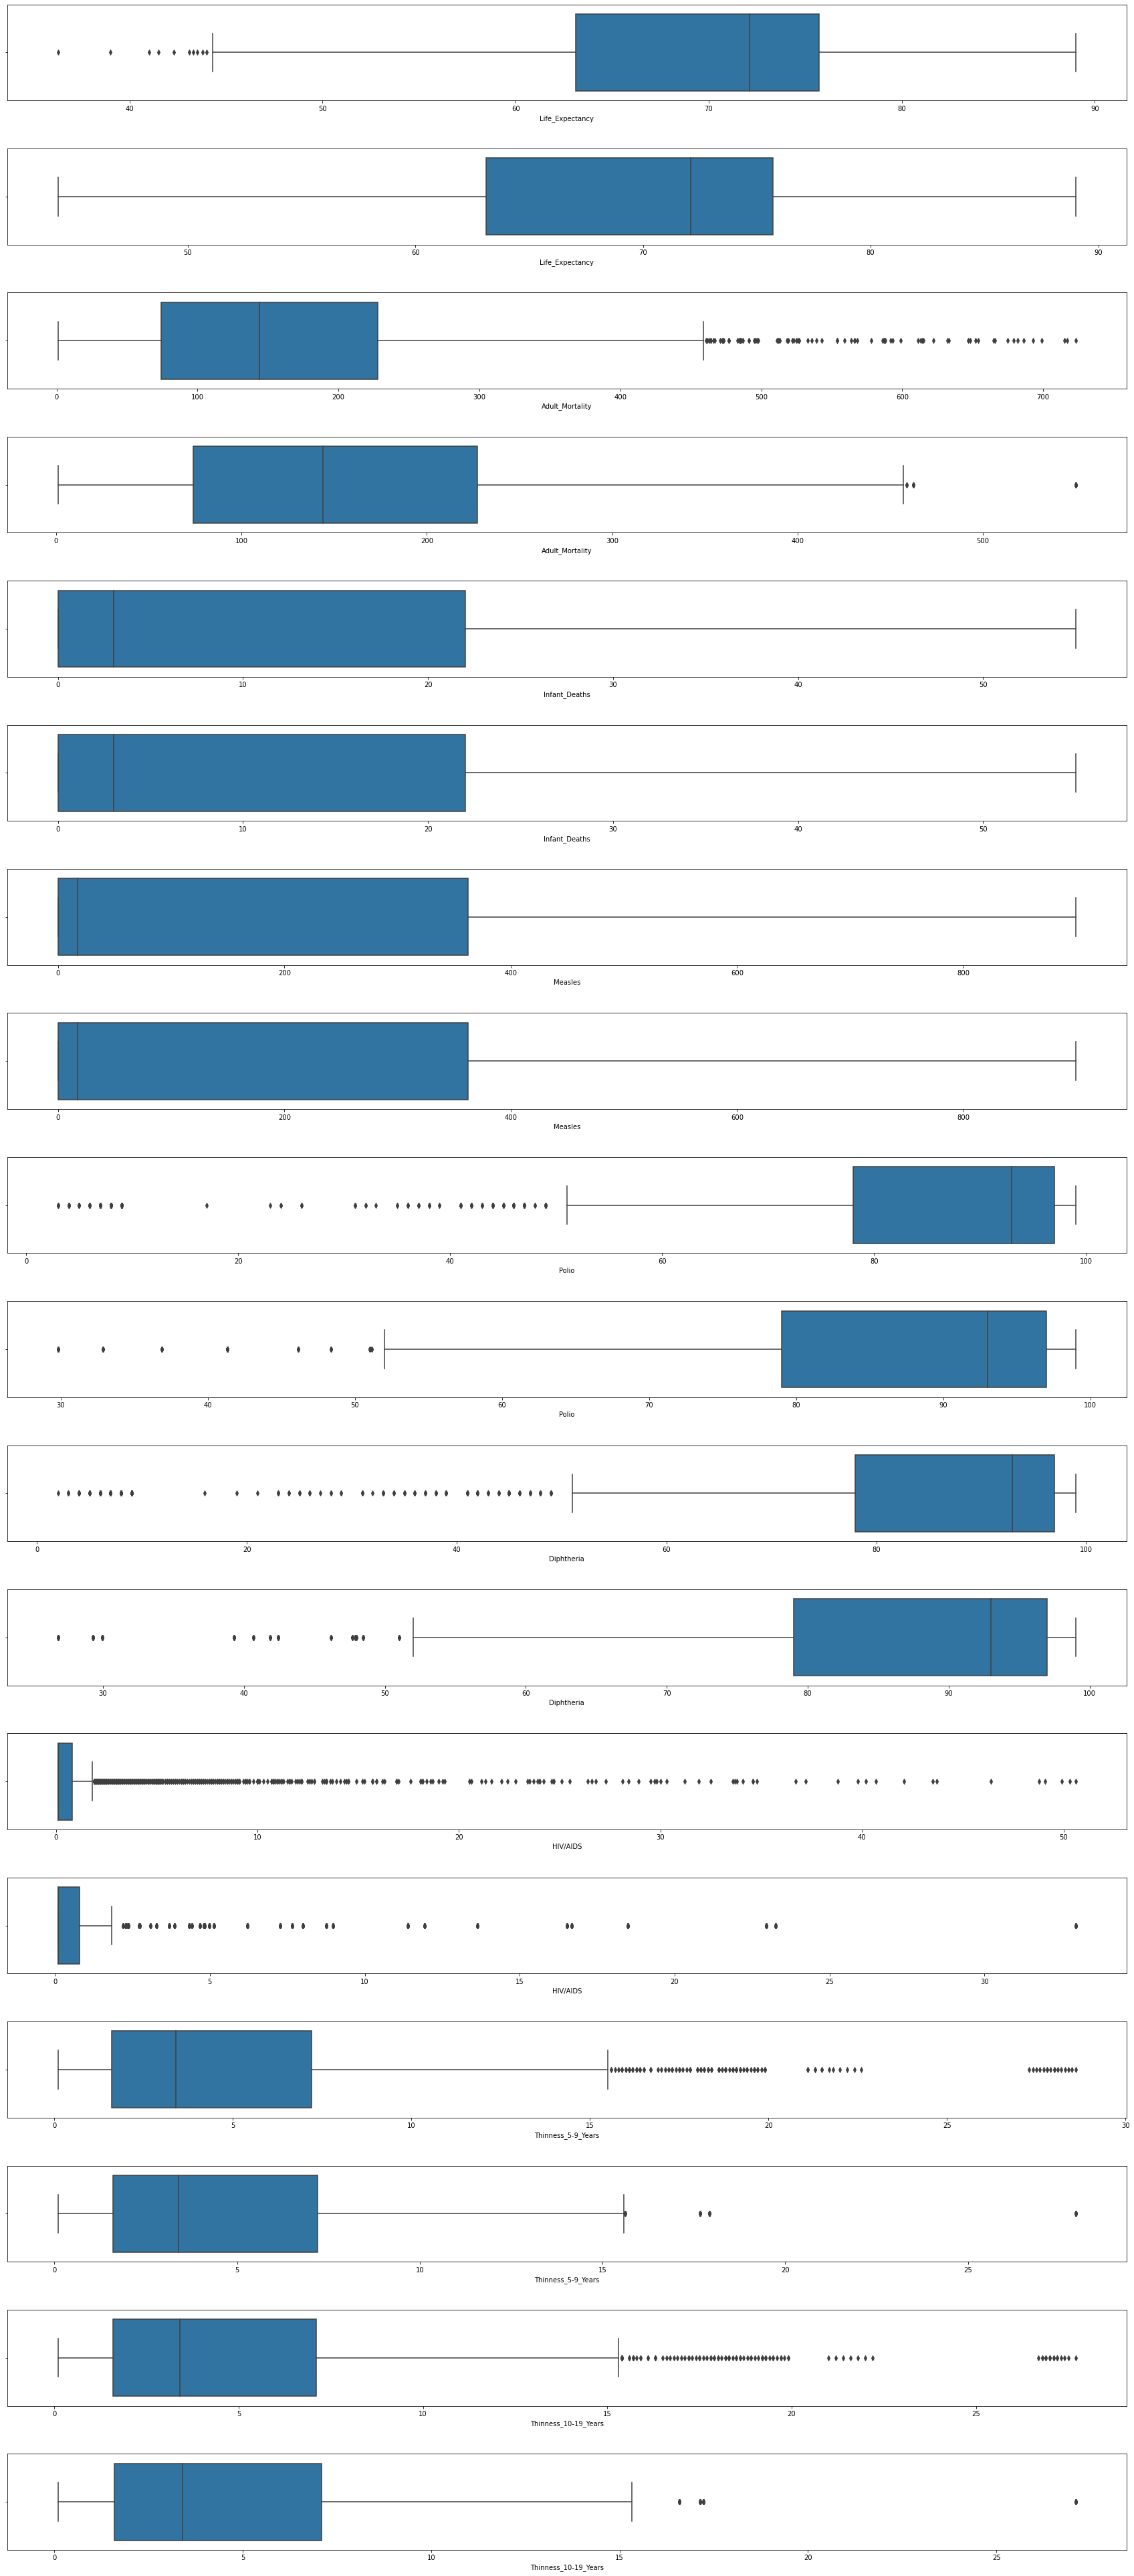

In [40]:
# USING THE MEAN OF EVERY COUNTRY SEPARATELY
df_lifeExpectancy_copy = df_lifeExpectancy.copy()

def applyCountryReplacement(df, col, country, compareTo, valueToReplace, right):
    if right:
        df.loc[(df.Country == country) & (df[col] > compareTo), col] = valueToReplace
    else:
        df.loc[(df.Country == country) & (df[col] < compareTo), col] = valueToReplace

# Removing outliers from the left and from the right.
for country in countriesInLifeExpectancy:
    for col in df_lifeExpectancy_copy.columns[3:]:
        maxValue = (IQR[col] * 1.5) + Q3[col]
        minValue = Q1[col] - (IQR[col] * 1.5)
        mean = calculateMean(df_lifeExpectancy_copy, 'Country', country, col)
        applyCountryReplacement(df_lifeExpectancy_copy, col, country, maxValue, mean, True)
        applyCountryReplacement(df_lifeExpectancy_copy, col, country, minValue, mean, False)

drawInterpolatedMultipleBoxPlots(df_lifeExpectancy, df_lifeExpectancy_copy, df_lifeExpectancy.columns[3:], 30, 70)

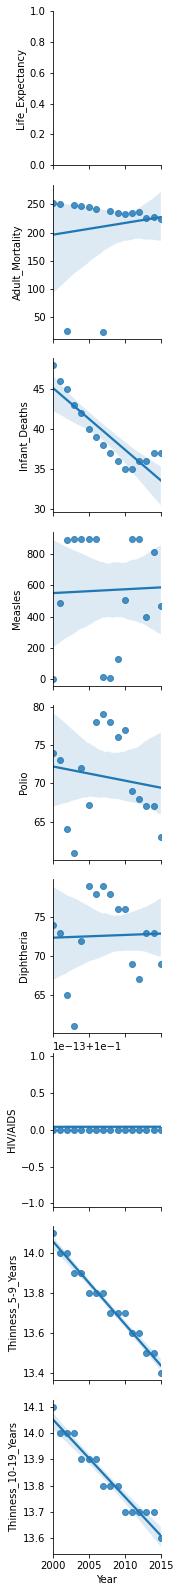

In [41]:
pairplot(df_lifeExpectancy_copy[df_lifeExpectancy_copy['Country'] == 'Yemen'], 'Year', df_lifeExpectancy_copy.columns[3:])

### Predicting the life expectancy values of the missing years (2016, 2017, 2018 and 2019)
### We will use linear regression to predict these values.

In [42]:
model = LinearRegression()
years = np.flip(np.array([*df_lifeExpectancy.groupby(['Year']).groups.keys()]).reshape(-1, 1))
allCountries = [*df_lifeExpectancy.groupby(['Country']).groups.keys()]
years_predict = np.array([2016, 2017, 2018, 2019]).reshape(-1, 1)
dicData = {} # Dictionary to include the records for these years.
i = 0
for country in allCountries:
    dicCountry = {} # Dictionary to hold the records for a single country.
    for columnName, columnData in df_lifeExpectancy.iteritems():
        if(columnName == 'Country'):
            dicCountry[columnName] = [country] * 4
            continue
        if(columnName == 'Status'):
            dicCountry[columnName] = [df_lifeExpectancy[df_lifeExpectancy['Country'] == country][columnName].tolist()[0]] * 4
            continue
        if(columnName == 'Year'):
            dicCountry[columnName] = [2016, 2017, 2018, 2019]
            continue
        x_train = np.array(df_lifeExpectancy[df_lifeExpectancy['Country'] == country][columnName]).reshape(-1, 1)
        model.fit(years, x_train)
        x_predict = model.predict(years_predict)
        dicCountry[columnName] = x_predict.flatten().tolist()
    i += 1
    dicData[country] = dicCountry

In [43]:
for country in dicData.keys():
    entry2016 = {}
    entry2017 = {}
    entry2018 = {}
    entry2019 = {}
    for col in dicData[country]:
        entry2016[col] = dicData[country][col][0]
        entry2017[col] = dicData[country][col][1]
        entry2018[col] = dicData[country][col][2]
        entry2019[col] = dicData[country][col][3]
    entries = pd.DataFrame([entry2016, entry2017, entry2018, entry2019])
    df_lifeExpectancy_copy = df_lifeExpectancy_copy.append(entries)

df_lifeExpectancy_copy.sort_values(by=['Country','Year'], inplace=True)
df_lifeExpectancy_copy = df_lifeExpectancy_copy.reset_index(drop=True)
df_lifeExpectancy_copy.head(20)

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0   Afghanistan  2000  Developing        54.800000       321.000000   
1   Afghanistan  2001  Developing        55.300000       316.000000   
2   Afghanistan  2002  Developing        56.200000         3.000000   
3   Afghanistan  2003  Developing        56.700000       295.000000   
4   Afghanistan  2004  Developing        57.000000       293.000000   
5   Afghanistan  2005  Developing        57.300000       291.000000   
6   Afghanistan  2006  Developing        57.300000       295.000000   
7   Afghanistan  2007  Developing        57.500000       295.000000   
8   Afghanistan  2008  Developing        58.100000       287.000000   
9   Afghanistan  2009  Developing        58.600000       281.000000   
10  Afghanistan  2010  Developing        58.800000       279.000000   
11  Afghanistan  2011  Developing        59.200000       275.000000   
12  Afghanistan  2012  Developing        59.500000       272.000000   
13  Afghanistan  2013  Developing        59.900000       268.000000   
14  Afghanistan  2014  Developing        59.900000       271.000000   
15  Afghanistan  2015  Developing        65.000000       263.000000   
16  Afghanistan  2016  Developing        62.020000       281.775000   
17  Afghanistan  2017  Developing        62.470147       283.270588   
18  Afghanistan  2018  Developing        62.920294       284.766176   
19  Afghanistan  2019  Developing        63.370441       286.261765   

    Infant_Deaths     Measles      Polio  Diphtheria  HIV/AIDS  \
0            55.0  899.000000  48.375000   52.312500       0.1   
1            55.0  899.000000  48.375000   52.312500       0.1   
2            55.0  899.000000  48.375000   52.312500       0.1   
3            55.0  798.000000  48.375000   52.312500       0.1   
4            55.0  466.000000  48.375000   52.312500       0.1   
5            55.0  899.000000  58.000000   58.000000       0.1   
6            55.0  899.000000  58.000000   58.000000       0.1   
7            55.0  899.000000  63.000000   63.000000       0.1   
8            55.0  899.000000  64.000000   64.000000       0.1   
9            55.0  899.000000  63.000000   63.000000       0.1   
10           55.0  899.000000  66.000000   66.000000       0.1   
11           55.0  899.000000  68.000000   68.000000       0.1   
12           55.0  899.000000  67.000000   67.000000       0.1   
13           55.0  430.000000  62.000000   64.000000       0.1   
14           55.0  492.000000  58.000000   62.000000       0.1   
15           55.0  899.000000  48.375000   65.000000       0.1   
16           55.0  729.500000  61.450000   77.700000       0.1   
17           55.0  719.926471  62.988235   80.686765       0.1   
18           55.0  710.352941  64.526471   83.673529       0.1   
19           55.0  700.779412  66.064706   86.660294       0.1   

    Thinness_5-9_Years  Thinness_10-19_Years  
0             2.500000              2.300000  
1             2.400000              2.100000  
2             2.200000             16.581250  
3            15.581250             16.581250  
4            15.581250             16.581250  
5            15.581250             16.581250  
6            15.581250             16.581250  
7            15.581250             16.581250  
8            15.581250             16.581250  
9            15.581250             16.581250  
10           15.581250             16.581250  
11           15.581250             16.581250  
12           15.581250             16.581250  
13           15.581250             16.581250  
14           15.581250             16.581250  
15           15.581250             16.581250  
16           22.502500             21.177500  
17           23.316765             21.718235  
18           24.131029             22.258971  
19           24.945294             22.799706

In [44]:
df_lifeExpectancy_copy = df_lifeExpectancy_copy.loc[df_lifeExpectancy_copy['Year'] >= 2015, :]
df_lifeExpectancy_copy.head(20)

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
15  Afghanistan  2015  Developing        65.000000       263.000000   
16  Afghanistan  2016  Developing        62.020000       281.775000   
17  Afghanistan  2017  Developing        62.470147       283.270588   
18  Afghanistan  2018  Developing        62.920294       284.766176   
19  Afghanistan  2019  Developing        63.370441       286.261765   
35      Albania  2015  Developing        77.800000        74.000000   
36      Albania  2016  Developing        78.310000        83.600000   
37      Albania  2017  Developing        78.681029        88.133824   
38      Albania  2018  Developing        79.052059        92.667647   
39      Albania  2019  Developing        79.423088        97.201471   
55      Algeria  2015  Developing        75.600000        19.000000   
56      Algeria  2016  Developing        76.347500        62.025000   
57      Algeria  2017  Developing        76.668529        56.594118   
58      Algeria  2018  Developing        76.989559        51.163235   
59      Algeria  2019  Developing        77.310588        45.732353   
75       Angola  2015  Developing        52.400000       335.000000   
76       Angola  2016  Developing        53.530000       419.700000   
77       Angola  2017  Developing        54.060735       430.422059   
78       Angola  2018  Developing        54.591471       441.144118   
79       Angola  2019  Developing        55.122206       451.866176   

    Infant_Deaths     Measles      Polio  Diphtheria  HIV/AIDS  \
15      55.000000  899.000000  48.375000   65.000000  0.100000   
16      55.000000  729.500000  61.450000   77.700000  0.100000   
17      55.000000  719.926471  62.988235   80.686765  0.100000   
18      55.000000  710.352941  64.526471   83.673529  0.100000   
19      55.000000  700.779412  66.064706   86.660294  0.100000   
35       0.000000    0.000000  99.000000   99.000000  0.100000   
36       0.000000  -76.500000  99.275000   99.250000  0.100000   
37      -0.080882  -91.779412  99.410294   99.389706  0.100000   
38      -0.161765 -107.058824  99.545588   99.529412  0.100000   
39      -0.242647 -122.338235  99.680882   99.669118  0.100000   
55      21.000000   63.000000  95.000000   95.000000  0.100000   
56      21.025000 -121.725000  97.700000   97.875000  0.100000   
57      21.108824 -180.450000  98.400000   98.580882  0.100000   
58      21.192647 -239.175000  99.100000   99.286765  0.100000   
59      21.276471 -297.900000  99.800000   99.992647  0.100000   
75      55.000000  118.000000  46.125000   64.000000  2.368750   
76      55.000000  674.600000  72.925000   78.800000  2.350000   
77      55.000000  670.700000  76.077941   82.460294  2.347794   
78      55.000000  666.800000  79.230882   86.120588  2.345588   
79      55.000000  662.900000  82.383824   89.780882  2.343382   

    Thinness_5-9_Years  Thinness_10-19_Years  
15           15.581250             16.581250  
16           22.502500             21.177500  
17           23.316765             21.718235  
18           24.131029             22.258971  
19           24.945294             22.799706  
35            1.300000              1.200000  
36            1.175000              1.072500  
37            1.113235              1.008235  
38            1.051471              0.943971  
39            0.989706              0.879706  
55            5.800000              6.000000  
56            5.650000              5.792500  
57            5.611765              5.757059  
58            5.573529              5.721618  
59            5.535294              5.686176  
75            8.200000              8.300000  
76           11.302500             11.467500  
77           11.847647             12.087941  
78           12.392794             12.708382  
79           12.937941             13.328824

# 4) Joining the 3 datasets together.

### Query tool to get the list of countries, from a dataframe.

In [45]:
def getCountriesList(df):
    return [*df.groupby(['Country']).groups.keys()]

In [46]:
print('Number of countries in life expectancy dataset:', len(getCountriesList(df_lifeExpectancy_copy)))
print('Number of countries in happiness dataset:', len(getCountriesList(df_happiness)))
print('Number of countries in 250 Countries dataset:', len(getCountriesList(df_countryData)))

Number of countries in life expectancy dataset: 183
Number of countries in happiness dataset: 148
Number of countries in 250 Countries dataset: 250


In [47]:
arr = set(getCountriesList(df_happiness)).difference(getCountriesList(df_lifeExpectancy_copy))
print('Countries in happiness dataset but not in the life expectancy dataset:', '(', len(arr), ')')
print(*arr, sep='\n')
print()
arr2 = set(getCountriesList(df_lifeExpectancy_copy)).difference(getCountriesList(df_happiness))
print('Countries in life expectancy dataset but not in the happiness dataset:', '(', len(arr2), ')')
print(*arr2, sep='\n')

Countries in happiness dataset but not in the life expectancy dataset: ( 21 )
Iran
Ivory Coast
Congo (Brazzaville)
Kosovo
Bolivia
Macedonia
Moldova
United States
Congo (Kinshasa)
Hong Kong
North Cyprus
Taiwan
South Korea
Tanzania
Russia
Syria
Venezuela
United Kingdom
Czech Republic
Palestinian Territories
Vietnam

Countries in life expectancy dataset but not in the happiness dataset: ( 56 )
South Sudan
Venezuela (Bolivarian Republic of)
Solomon Islands
Bahamas
Papua New Guinea
The former Yugoslav republic of Macedonia
Saint Lucia
Samoa
Fiji
Timor-Leste
Saint Vincent and the Grenadines
Equatorial Guinea
Swaziland
Gambia
Côte d'Ivoire
Cuba
Eritrea
Sao Tome and Principe
United States of America
Seychelles
Mozambique
Barbados
Namibia
Djibouti
Grenada
Vanuatu
Maldives
Viet Nam
Brunei Darussalam
Somalia
Kiribati
Lao People's Democratic Republic
Republic of Moldova
Comoros
Cabo Verde
Micronesia (Federated States of)
Suriname
Tonga
Democratic Republic of the Congo
Syrian Arab Republic
United K

### Using the countries difference found above, we renamed the counrtries in the life expectancy dataset to have a consistent naming schema.

In [48]:
df_lifeExpectancy_copy['Country'] = df_lifeExpectancy_copy['Country'].replace({
    'Iran (Islamic Republic of)':'Iran', 
    'Czechia':'Czech Republic',
    'Democratic Republic of the Congo':'Congo (Kinshasa)',
    'Congo':'Congo (Brazzaville)',
    'United Republic of Tanzania':'Tanzania',
    'Russian Federation':'Russia',
    'United States of America':'United States',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    "Côte d'Ivoire":'Ivory Coast',
    'Viet Nam':'Vietnam',
    'Republic of Korea':'South Korea',
    'Syrian Arab Republic':'Syria',
    "Lao People's Democratic Republic":'Laos',
    'Republic of Moldova':'Moldova',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Bolivia (Plurinational State of)':'Bolivia',
    'The former Yugoslav republic of Macedonia':'Macedonia',
    'Czechia':'Czech Republic'
    })

### Rechecking for differences: we find now that there is an improvement.

In [49]:
arr = set(getCountriesList(df_happiness)).difference(getCountriesList(df_lifeExpectancy_copy))
print('Countries in happiness dataset but not in the life expectancy dataset:', '(', len(arr), ')')
print(*arr, sep='\n')
print()
arr2 = set(getCountriesList(df_lifeExpectancy_copy)).difference(getCountriesList(df_happiness))
print('Countries in life expectancy dataset but not in the happiness dataset:', '(', len(arr2), ')')
print(*arr2, sep='\n')

Countries in happiness dataset but not in the life expectancy dataset: ( 5 )
North Cyprus
Palestinian Territories
Hong Kong
Taiwan
Kosovo

Countries in life expectancy dataset but not in the happiness dataset: ( 40 )
South Sudan
Brunei Darussalam
Somalia
Solomon Islands
Kiribati
Bahamas
Comoros
Cabo Verde
Micronesia (Federated States of)
Papua New Guinea
Suriname
Tonga
Saint Lucia
Samoa
Fiji
Timor-Leste
Belize
Saint Vincent and the Grenadines
Guinea-Bissau
Laos
Central African Republic
Equatorial Guinea
Swaziland
Oman
Gambia
Guyana
Democratic People's Republic of Korea
Cuba
Eritrea
Sao Tome and Principe
Seychelles
Mozambique
Barbados
Namibia
Djibouti
Antigua and Barbuda
Lesotho
Grenada
Vanuatu
Maldives


In [50]:
countriesListJoined_lifeExpectancy_happiness = set(getCountriesList(df_lifeExpectancy_copy)) & set(getCountriesList(df_happiness))
print('Number of countries after joining happiness dataset with life expectancy dataset:', len(countriesListJoined_lifeExpectancy_happiness))
print('Country list after joining:', *countriesListJoined_lifeExpectancy_happiness, sep='\n')

Number of countries after joining happiness dataset with life expectancy dataset: 143
Country list after joining:
Mauritius
Italy
Angola
Philippines
Burundi
Tajikistan
Iran
Qatar
Tunisia
Ivory Coast
Congo (Brazzaville)
Sudan
Sri Lanka
Iraq
Rwanda
Kenya
Estonia
Latvia
Haiti
Pakistan
Slovakia
Turkmenistan
Uruguay
Bolivia
Macedonia
Denmark
Ecuador
Senegal
Panama
Mexico
Moldova
Niger
Chad
Malaysia
Mali
India
Uzbekistan
United States
Finland
Ireland
Ghana
Guinea
Mongolia
Nigeria
Belgium
Colombia
Congo (Kinshasa)
Austria
Chile
Lebanon
Kazakhstan
Indonesia
United Arab Emirates
Cambodia
Hungary
Malawi
Sierra Leone
Honduras
Israel
Libya
Algeria
Saudi Arabia
Brazil
Netherlands
Cyprus
New Zealand
Lithuania
Jordan
Trinidad and Tobago
Norway
Turkey
Poland
Ethiopia
Australia
Sweden
Armenia
Mauritania
Switzerland
Yemen
Ukraine
Germany
Costa Rica
Japan
Malta
Azerbaijan
Belarus
Albania
South Korea
Madagascar
Tanzania
Bangladesh
Liberia
China
Greece
Russia
Bhutan
Morocco
Guatemala
Syria
Egypt
France
Ice

In [51]:
print('Countries to be dropped from the happiness dataset:', set(getCountriesList(df_happiness)).difference(getCountriesList(df_lifeExpectancy_copy)))

Countries to be dropped from the happiness dataset: {'North Cyprus', 'Palestinian Territories', 'Hong Kong', 'Taiwan', 'Kosovo'}


### Now to join the 250 country data set with the filtered country list after joining life expectancy countries with happiness.

In [52]:
arr = set(countriesListJoined_lifeExpectancy_happiness).difference(getCountriesList(df_countryData))
print('In the cleaned list of countries and not in the 250 countries dataset:', '(', len(arr), ')')
print(*arr, sep='\n')
print()
arr2 = set(getCountriesList(df_countryData)).difference(countriesListJoined_lifeExpectancy_happiness)
print('In the 250 countries dataset and not in the cleaned list of countries:', '(', len(arr2), ')')
print(*arr2, sep='\n')

In the cleaned list of countries and not in the 250 countries dataset: ( 15 )
Bolivia
Macedonia
Iran
South Korea
United Kingdom
Tanzania
Ivory Coast
United States
Congo (Brazzaville)
Vietnam
Russia
Venezuela
Moldova
Congo (Kinshasa)
Syria

In the 250 countries dataset and not in the cleaned list of countries: ( 122 )
Curaçao
South Sudan
Venezuela (Bolivarian Republic of)
French Guiana
Turks and Caicos Islands
Solomon Islands
Mayotte
Congo (Democratic Republic of the)
Saint Kitts and Nevis
Åland Islands
American Samoa
Bahamas
Christmas Island
Montserrat
Macedonia (the former Yugoslav Republic of)
Cocos (Keeling) Islands
Virgin Islands (U.S.)
Papua New Guinea
Réunion
Saint Lucia
New Caledonia
Samoa
Faroe Islands
Fiji
Timor-Leste
Monaco
Republic of Kosovo
Norfolk Island
Saint Vincent and the Grenadines
Cayman Islands
Bermuda
Tuvalu
Equatorial Guinea
Palau
Saint Pierre and Miquelon
Swaziland
Svalbard and Jan Mayen
Saint Barthélemy
Dominica
Heard Island and McDonald Islands
Gambia
Niue
Côte

In [53]:
df_countryData['Country'] = df_countryData['Country'].replace({
    'Iran (Islamic Republic of)':'Iran',
    'Tanzania, United Republic of':'Tanzania',
    'Congo':'Congo (Brazzaville)',
    'Congo (Democratic Republic of the)':'Congo (Kinshasa)',
    'Russian Federation':'Russia',
    'United States of America':'United States',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    "Côte d'Ivoire":'Ivory Coast',
    'Viet Nam':'Vietnam',
    'Korea (Republic of)':'South Korea',
    'Syrian Arab Republic':'Syria',
    "Lao People's Democratic Republic":'Laos', 
    'Moldova (Republic of)':'Moldova',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Macedonia (the former Yugoslav Republic of)':'Macedonia'
    })

In [54]:
arr = set(countriesListJoined_lifeExpectancy_happiness).difference(getCountriesList(df_countryData))
print('In the cleaned list of countries and not in the 250 countries dataset:', '(', len(arr), ')')
print(*arr, sep='\n')
print()
arr2 = set(getCountriesList(df_countryData)).difference(countriesListJoined_lifeExpectancy_happiness)
print('In the 250 countries dataset and not in the cleaned list of countries:', '(', len(arr2), ')')
print(*arr2, sep='\n')

In the cleaned list of countries and not in the 250 countries dataset: ( 0 )


In the 250 countries dataset and not in the cleaned list of countries: ( 107 )
Curaçao
South Sudan
French Guiana
Turks and Caicos Islands
Solomon Islands
Mayotte
Saint Kitts and Nevis
Åland Islands
American Samoa
Bahamas
Christmas Island
Montserrat
Cocos (Keeling) Islands
Virgin Islands (U.S.)
Papua New Guinea
Réunion
Saint Lucia
New Caledonia
Samoa
Faroe Islands
Fiji
Timor-Leste
Monaco
Republic of Kosovo
Norfolk Island
Saint Vincent and the Grenadines
Cayman Islands
Bermuda
Tuvalu
Laos
Equatorial Guinea
Palau
Saint Pierre and Miquelon
Swaziland
Svalbard and Jan Mayen
Saint Barthélemy
Dominica
Heard Island and McDonald Islands
Gambia
Niue
South Georgia and the South Sandwich Islands
Liechtenstein
Cuba
Eritrea
Sao Tome and Principe
Seychelles
Isle of Man
Mozambique
Nauru
Barbados
Greenland
Namibia
Anguilla
Bouvet Island
Djibouti
Guernsey
Grenada
Vanuatu
Hong Kong
Maldives
Gibraltar
Jersey
Virgin Islands (Brit

In [55]:
countriesList_joinedThree = set(getCountriesList(df_countryData)) & set(countriesListJoined_lifeExpectancy_happiness)
print('Count of countries after joining all three datasets:', len(countriesList_joinedThree), *sorted(countriesList_joinedThree), sep='\n')

Count of countries after joining all three datasets:
143
Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Croatia
Cyprus
Czech Republic
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Finland
France
Gabon
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liberia
Libya
Lithuania
Luxembourg
Macedonia
Madagascar
Malawi
Malaysia
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
Mongolia
Montenegro
Morocco
Myanmar
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
Norway
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saudi A

### Dropping the countries that are not in the joined list of countries from all data frames.

In [56]:
df_countryData = df_countryData.loc[(df_countryData['Country'].isin(countriesList_joinedThree)), :]
df_happiness = df_happiness.loc[(df_happiness['Country'].isin(countriesList_joinedThree)), :]
df_lifeExpectancy_copy = df_lifeExpectancy_copy.loc[(df_lifeExpectancy_copy['Country'].isin(countriesList_joinedThree)), :]

In [57]:
print('Countries in country data:', len(getCountriesList(df_countryData)))
print('Countries in happiness:', len(getCountriesList(df_happiness)))
print('Coutnries in life expectancy:', len(getCountriesList(df_lifeExpectancy_copy)))

Countries in country data: 143
Countries in happiness: 143
Coutnries in life expectancy: 143


### Merging Life expectancy dataset with the Happiness dataset.

In [58]:
print(len(df_lifeExpectancy_copy), len(df_happiness))
df_merged_expectancyHappiness = pd.merge(df_lifeExpectancy_copy, df_happiness, on=['Country', 'Year'], how='inner')
df_merged_expectancyHappiness

715 715


Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0    Afghanistan  2015  Developing        65.000000       263.000000   
1    Afghanistan  2016  Developing        62.020000       281.775000   
2    Afghanistan  2017  Developing        62.470147       283.270588   
3    Afghanistan  2018  Developing        62.920294       284.766176   
4    Afghanistan  2019  Developing        63.370441       286.261765   
..           ...   ...         ...              ...              ...   
710     Zimbabwe  2015  Developing        67.000000       336.000000   
711     Zimbabwe  2016  Developing        61.467500       356.425000   
712     Zimbabwe  2017  Developing        62.759265       343.960294   
713     Zimbabwe  2018  Developing        64.051029       331.495588   
714     Zimbabwe  2019  Developing        65.342794       319.030882   

     Infant_Deaths     Measles       Polio  Diphtheria   HIV/AIDS  \
0        55.000000  899.000000   48.375000   65.000000   0.100000   
1        55.000000  729.500000   61.450000   77.700000   0.100000   
2        55.000000  719.926471   62.988235   80.686765   0.100000   
3        55.000000  710.352941   64.526471   83.673529   0.100000   
4        55.000000  700.779412   66.064706   86.660294   0.100000   
..             ...         ...         ...         ...        ...   
710      22.000000    0.000000   88.000000   87.000000  23.262500   
711      26.100000  -18.725000   96.500000   92.075000  -0.280000   
712      26.045588  -59.810294   98.955882   94.061765  -3.049706   
713      25.991176 -100.895588  101.411765   96.048529  -5.819412   
714      25.936765 -141.980882  103.867647   98.035294  -8.589118   

     Thinness_5-9_Years  Thinness_10-19_Years  Economy_GDP_per_Capita  \
0             15.581250             16.581250                0.319820   
1             22.502500             21.177500                0.382270   
2             23.316765             21.718235                0.401477   
3             24.131029             22.258971                0.332000   
4             24.945294             22.799706                0.319820   
..                  ...                   ...                     ...   
710            5.500000              5.600000                0.271000   
711            6.410000              6.622500                0.350410   
712            6.342059              6.576618                0.375847   
713            6.274118              6.530735                0.357000   
714            6.206176              6.484853                0.271000   

       Family   Freedom  Generosity  Happiness_Rank  Happiness_Score  \
0    0.302850  0.234140    0.365100             153            3.575   
1    0.110370  0.164300    0.312680             154            3.360   
2    0.581543  0.106180    0.311871             141            3.794   
3    0.537000  0.085000    0.191000             145            3.632   
4    0.302850  0.234140    0.365100             153            3.575   
..        ...       ...         ...             ...              ...   
710  1.032760  0.258610    0.189870             115            4.610   
711  0.714780  0.254290    0.185030             131            4.193   
712  1.083096  0.336384    0.189143             138            3.875   
713  1.094000  0.406000    0.132000             144            3.692   
714  1.032760  0.258610    0.189870             115            4.610   

     Health_Life_Expectancy  Trust_Government_Corruption  
0                  0.303350                     0.097190  
1                  0.173440                     0.071120  
2                  0.180747                     0.061158  
3                  0.255000                     0.036000  
4                  0.303350                     0.097190  
..                      ...                          ...  
710                0.334750                     0.080790  
711                0.159500                     0.085820  
712                0.196764               

### Merging country data with the merged dataset of Happiness and life expectancy.

In [59]:
df_mergedThree = pd.merge(df_merged_expectancyHappiness, df_countryData, on='Country', how='inner')
df_mergedThree.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS',
       'Thinness_5-9_Years', 'Thinness_10-19_Years', 'Economy_GDP_per_Capita',
       'Family', 'Freedom', 'Generosity', 'Happiness_Rank', 'Happiness_Score',
       'Health_Life_Expectancy', 'Trust_Government_Corruption', 'Region',
       'Subregion', 'Population', 'Area', 'Gini', 'Real Growth Rating',
       'Literacy Rate', 'Inflation', 'Unemployment'],
      dtype='object')

#### Explorting the missing values/data in the clean merged dataset.

In [60]:
calculate_missingdata_pct(df_mergedThree)

Category  Percentage
0                       Country    0.000000
1                          Year    0.000000
2                        Status    0.000000
3               Life_Expectancy    0.000000
4               Adult_Mortality    0.000000
5                 Infant_Deaths    0.000000
6                       Measles    0.000000
7                         Polio    0.000000
8                    Diphtheria    0.000000
9                      HIV/AIDS    0.000000
10           Thinness_5-9_Years    0.000000
11         Thinness_10-19_Years    0.000000
12       Economy_GDP_per_Capita    0.000000
13                       Family    0.000000
14                      Freedom    0.000000
15                   Generosity    0.000000
16               Happiness_Rank    0.000000
17              Happiness_Score    0.000000
18       Health_Life_Expectancy    0.000000
19  Trust_Government_Corruption    0.139860
20                       Region    0.000000
21                    Subregion    0.000000
22                   Population    0.000000
23                         Area    0.000000
24                         Gini    9.090909
25           Real Growth Rating   20.279720
26                Literacy Rate   16.083916
27                    Inflation   20.979021
28                 Unemployment   20.979021

# Research Questions

## Question 1: What is the relationship between life expectency and happiness in each Region?

In [61]:
regions = [*df_mergedThree.groupby('Region').groups.keys()]
lifeExpectancyMeanByRegion = []
happinessMeanByRegion = []
regionArea=[]
for region in regions:
    meanLE = df_mergedThree[df_mergedThree['Region'] == region]['Life_Expectancy'].mean()
    meanH = df_mergedThree[df_mergedThree['Region'] == region]['Happiness_Score'].mean()
    sumArea = df_mergedThree[df_mergedThree['Region'] == region]['Area'].sum()
    sumArea = sumArea/5
    lifeExpectancyMeanByRegion.append(meanLE)
    happinessMeanByRegion.append(meanH)
    regionArea.append(sumArea)
# print(lifeExpectancyMeanByRegion, happinessMeanByRegion)
df_q1 = pd.DataFrame({'Region': regions, 'Life_Expectancy': lifeExpectancyMeanByRegion, 'Happiness_Score': happinessMeanByRegion, 'Area':regionArea})

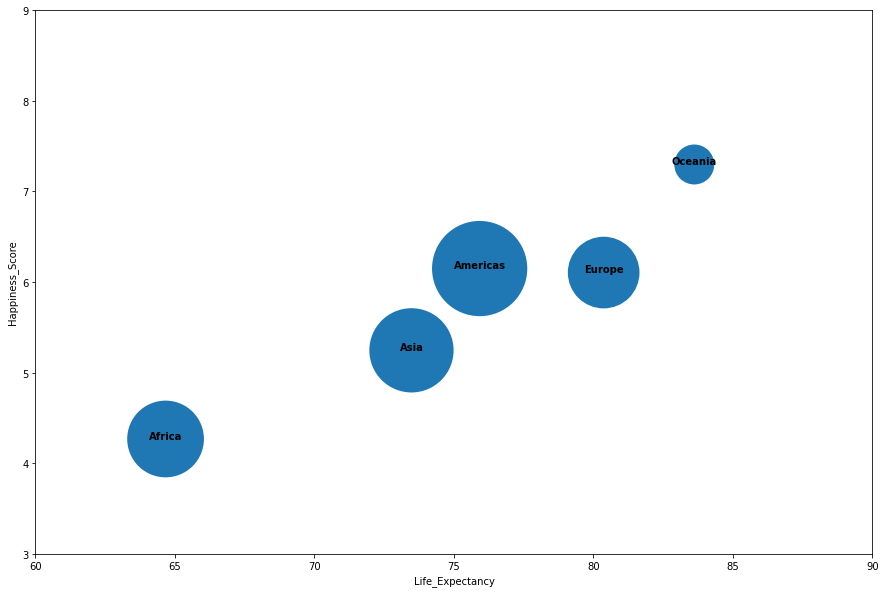

In [62]:
plt.figure(figsize = (15,10))

ax = sns.scatterplot(df_q1['Life_Expectancy'], df_q1['Happiness_Score'],size = df_q1['Area'], sizes=(2000,10000), legend=False)
ax.set_xlim(60,90)
ax.set_ylim(3, 9)

#For each point, we add a text inside the bubble
for line in range(0, df_q1.shape[0]):
     ax.text(df_q1['Life_Expectancy'].iloc[line], df_q1['Happiness_Score'].iloc[line], df_q1['Region'].iloc[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

(60.0, 90.0)

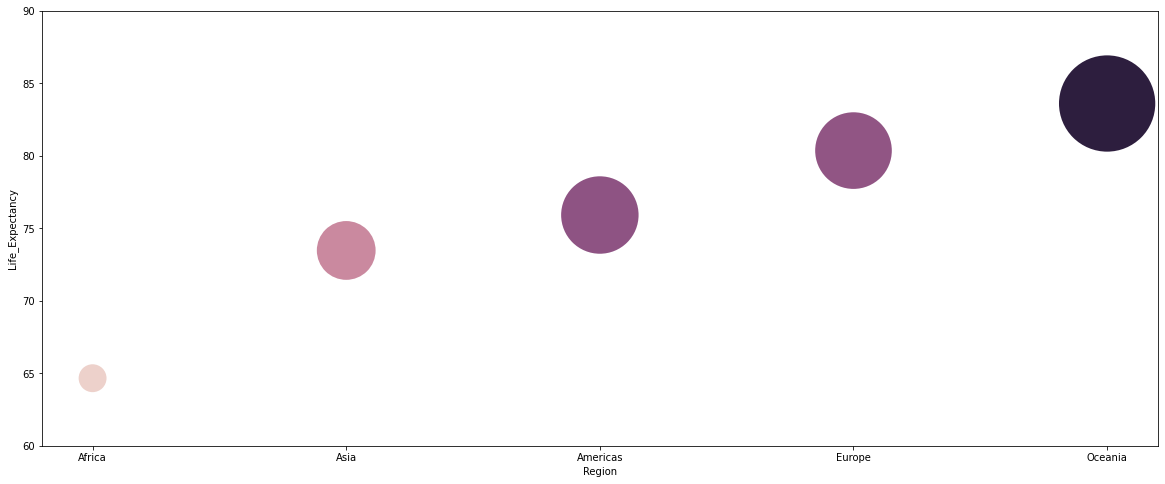

In [63]:
df_q1_copy=df_q1.copy()
df_q1_copy.sort_values(by='Life_Expectancy', inplace=True)

plt.figure(figsize=(20,8))
sns.scatterplot(data=df_q1_copy, x="Region", y="Life_Expectancy", hue="Happiness_Score",size="Happiness_Score",sizes=(1000, 10000), legend=False)
plt.ylim((60,90))


## Question 2: What is the happiness factor that contributes the most to the happiness score, based on the Region?

We will perform scalling on the columns in happiness as they are percentage of contribution to the happiness scale,
which makes sense to be values from 0 to 1 consistently.

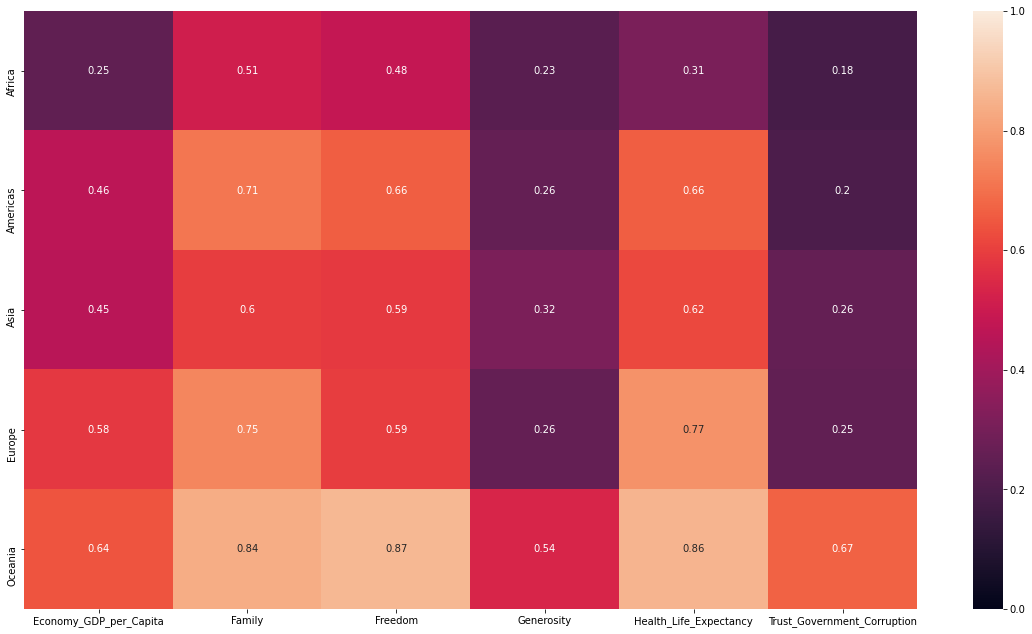

In [64]:
df_scaled = df_mergedThree.copy()
columnsInHappiness = ['Economy_GDP_per_Capita', 'Family', 'Freedom', 'Generosity', 'Health_Life_Expectancy', 'Trust_Government_Corruption']
# Perfoming min max scalling to these columns and saving it a new scaled dataset.
# This is to ensure that these columns abide to the same range of values,
# leading to better visualisations and easier comparisons.
df_scaled[columnsInHappiness] = MinMaxScaler().fit_transform(df_scaled[columnsInHappiness])
dic = {}
for col in columnsInHappiness:
    arr = []
    for region in regions:
        mean = df_scaled[df_scaled['Region'] == region][col].mean()
        arr.append(mean)
    dic[col] = arr

df_q2 = pd.DataFrame(dic)
plt.figure(figsize=(20, 11))
ax = sns.heatmap(df_q2, annot=True, vmin=0, vmax=1)
ax.set_yticklabels(regions)
plt.show()

## Question 3: Count of Countries with life expectancy less/greater than the total average in each year.

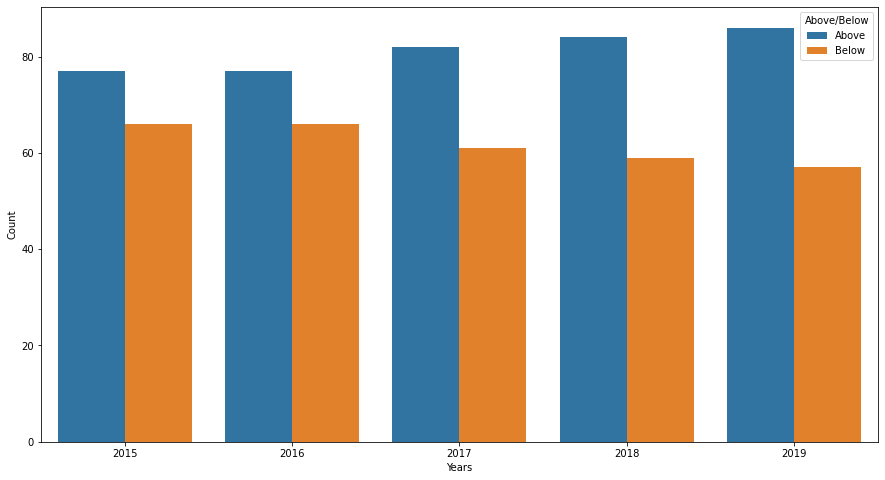

In [65]:
df_researchQuestion3=df_mergedThree.copy()
averageLifeExpectanciesPerYear =[]
years=np.concatenate([np.array([[2015]]),years_predict]).flatten()
average=[]
for year in years:
    averageLifeExpectanciesPerYear.append(df_researchQuestion3[df_researchQuestion3['Year']==year]['Life_Expectancy'].mean())
for currentYear,lifeExpectancy in zip(df_researchQuestion3['Year'],df_researchQuestion3['Life_Expectancy']):
    if(currentYear=='2015'):
        if(lifeExpectancy<averageLifeExpectanciesPerYear[0]):
            average.append('Below average')
        else:
            average.append('Above average')
    elif(currentYear=='2016'):
        if(lifeExpectancy<averageLifeExpectanciesPerYear[1]):
            average.append('Below average')
        else:
            average.append('Above average')
    elif(currentYear=='2017'):
        if(lifeExpectancy<averageLifeExpectanciesPerYear[2]):
            average.append('Below average')
        else:
            average.append('Above average')
    elif(currentYear=='2018'):
        if(lifeExpectancy<averageLifeExpectanciesPerYear[3]):
            average.append('Below average')
        else:
            average.append('Above average')
    else:
        if(lifeExpectancy<averageLifeExpectanciesPerYear[4]):
            average.append('Below average')
        else:
            average.append('Above average')

d={'Country':df_researchQuestion3['Country'],
            'Year':df_researchQuestion3['Year'],
                            'AverageComparison':average}
df_temp=pd.DataFrame(d)
df_yearAverageRelation=pd.DataFrame(columns=['Years','Above/Below','Count'])
for year in years:
    insert_loc = df_yearAverageRelation.index.max()
    if pd.isna(insert_loc):
        df_yearAverageRelation.loc[0] = [year,'Above',int(df_temp[(df_temp['Year']==year) & 
        (df_temp['AverageComparison']=='Above average')]['AverageComparison'].count())]
        df_yearAverageRelation.loc[1] = [year,'Below',int(df_temp[(df_temp['Year']==year) & 
        (df_temp['AverageComparison']=='Below average')]['AverageComparison'].count())]
    else:
        df_yearAverageRelation.loc[insert_loc + 1] = [year,'Above',int(df_temp[(df_temp['Year']==year) & 
        (df_temp['AverageComparison']=='Above average')]['AverageComparison'].count())]
        df_yearAverageRelation.loc[insert_loc + 2] = [year,'Below',int(df_temp[(df_temp['Year']==year) & 
        (df_temp['AverageComparison']=='Below average')]['AverageComparison'].count())]
df_yearAverageRelation.dtypes
df_yearAverageRelation['Count']=pd.to_numeric(df_yearAverageRelation['Count'])
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="Years", y="Count", hue="Above/Below",data=df_yearAverageRelation)

## Question 4: Number of deaths by Measles in each region.

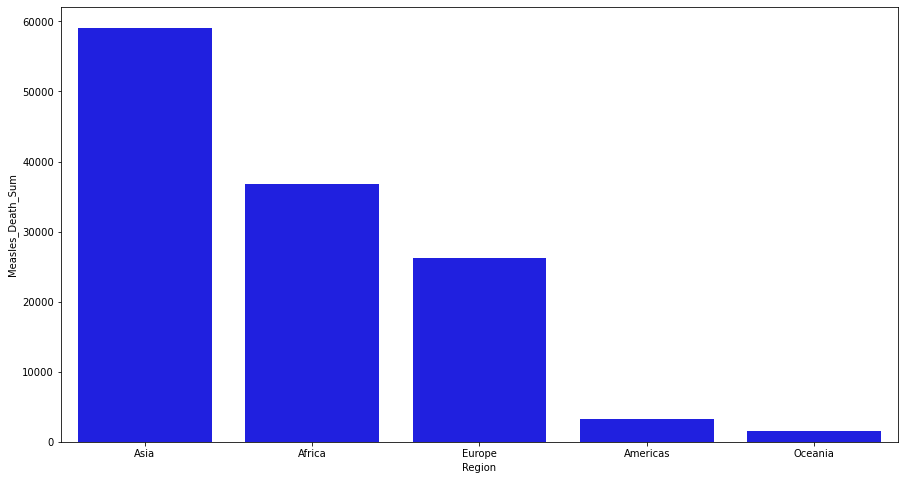

In [66]:
arr = []
for region in regions:
    sum = df_mergedThree[df_mergedThree['Region'] == region]['Measles'].sum()
    arr.append(sum)
df_q4 = pd.DataFrame({'Region': regions, 'Measles_Death_Sum': arr})
df_q4.sort_values('Measles_Death_Sum', inplace=True, ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x='Region', y='Measles_Death_Sum', data=df_q4, color='Blue')

## Question 5: What is the happiness ranks of Egypt over the years?

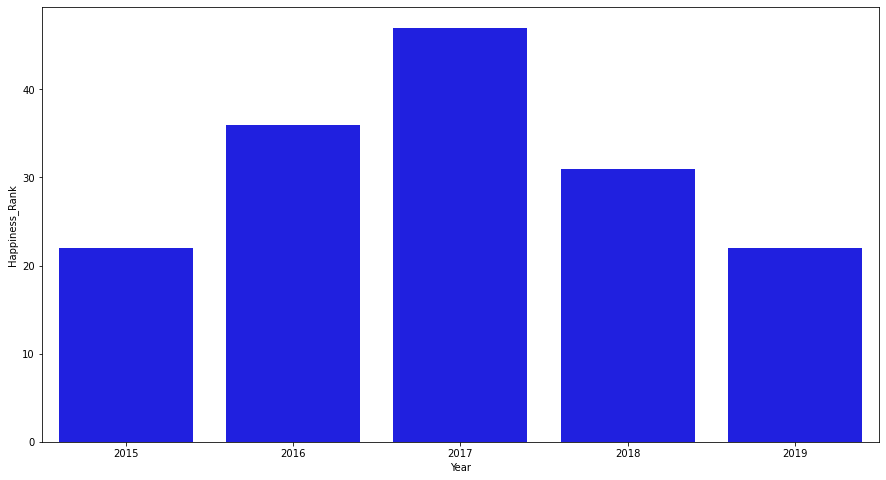

In [67]:
df_mergedThree_copy = df_mergedThree.copy()
df_mergedThree_copy = df_mergedThree_copy[['Country', 'Year', 'Happiness_Score']]
df_mergedThree_2015 = df_mergedThree_copy[df_mergedThree_copy['Year'] == 2015]
df_mergedThree_2016 = df_mergedThree_copy[df_mergedThree_copy['Year'] == 2016]
df_mergedThree_2017 = df_mergedThree_copy[df_mergedThree_copy['Year'] == 2017]
df_mergedThree_2018 = df_mergedThree_copy[df_mergedThree_copy['Year'] == 2018]
df_mergedThree_2019 = df_mergedThree_copy[df_mergedThree_copy['Year'] == 2019]

df_mergedThree_2015.sort_values('Happiness_Score', inplace=True)
df_mergedThree_2015['Happiness_Rank'] = list(range(1, len(df_mergedThree_2015) + 1))
df_mergedThree_2016.sort_values('Happiness_Score', inplace=True)
df_mergedThree_2016['Happiness_Rank'] = list(range(1, len(df_mergedThree_2016) + 1))

df_mergedThree_2017.sort_values('Happiness_Score', inplace=True)
df_mergedThree_2017['Happiness_Rank'] = list(range(1, len(df_mergedThree_2017) + 1))

df_mergedThree_2018.sort_values('Happiness_Score', inplace=True)
df_mergedThree_2018['Happiness_Rank'] = list(range(1, len(df_mergedThree_2018) + 1))

df_mergedThree_2019.sort_values('Happiness_Score', inplace=True)
df_mergedThree_2019['Happiness_Rank'] = list(range(1, len(df_mergedThree_2019) + 1))

rankArr = [
    int(df_mergedThree_2015[df_mergedThree_2015['Country'] == 'Egypt']['Happiness_Rank']),
    int(df_mergedThree_2016[df_mergedThree_2016['Country'] == 'Egypt']['Happiness_Rank']),
    int(df_mergedThree_2017[df_mergedThree_2017['Country'] == 'Egypt']['Happiness_Rank']),
    int(df_mergedThree_2018[df_mergedThree_2018['Country'] == 'Egypt']['Happiness_Rank']),
    int(df_mergedThree_2019[df_mergedThree_2019['Country'] == 'Egypt']['Happiness_Rank'])
    ]

df_Egypt = pd.DataFrame({'Year': [2015, 2016, 2017, 2018, 2019], 'Happiness_Rank': rankArr})
plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='Happiness_Rank', data=df_Egypt, color='Blue')

# Integrating with an external dataset to get accurate population information. Source: https://population.un.org/wpp/Download/Standard/Population/ 

In [68]:
df_population = pd.read_excel(r'external datasets/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx', engine='openpyxl', index_col=0)
df_population.head(40)

354464   
23                                                      38695.7      39278.6   
24                                                          ...          ...   

                                                    Unnamed: 72  Unnamed: 73  \
NaN                                                         NaN          NaN   
NaN                                                         NaN          NaN   
NaN                                                         NaN          NaN   
United Nations                                              NaN          NaN   
Population Division                                         NaN          NaN   
Department of Economic and Social Affairs                   NaN          NaN   
NaN                                                         NaN          NaN   
World Population Prospects 2019                             NaN          NaN   
File POP/1-1: Total population (both sexes comb...          NaN          NaN   
Estimates, 1950 - 2020                                      NaN          NaN   
POP/DB/WPP/Rev.2019/POP/F01-1                               NaN          NaN   
© August 2019 by United Nations, made available...          NaN          NaN   
Suggested citation: United Nations, Department ...          NaN          NaN   
NaN                                                         NaN          NaN   
NaN                                                         NaN          NaN   
Index                                                      2015         2016   
1                                                    7.3798e+06  7.46402e+06   
2                                                           ...          ...   
3                                                   1.25662e+06  1.26048e+06   
4                                                   6.12317e+06  6.20354e+06   
5                                                        941131       963520   
6                                                   5.18204e+06  5.24002e+06   
7                                                   4.68498e+06  4.75802e+06   
8                                                        473817       485277   
9                                                       68855.5        69515   
10                                                          ...          ...   
11                                                  1.23393e+06  1.24043e+06   
12                                                  5.46052e+06  5.52084e+06   
13                                                  2.56652e+06  2.58569e+06   
14                                                    2.894e+06  2.93515e+06   
15                                                       682576       699951   
16                                                      2771.03      2801.61   
17                                                          ...          ...   
18                                                  1.18244e+06  1.21304e+06   
19                                                  4.43348e+06  4.47661e+06   
20                                                       743059       744269   
21                                                       623934       630145   
22                                                       357031       359525   
23                                                      39858.7      40435.6   
24                                                          ...          ...   

                                                    Unnamed: 74  Unnamed: 75  \
NaN                                                         NaN          NaN   
NaN                                                         NaN          NaN   
NaN                                                         NaN          NaN   
United Nations                                              NaN          NaN   
Population Division                                         NaN          NaN   
Department of Economic and Social Affairs                   NaN     

In [69]:
df_population.columns = df_population.iloc[15]
df_population = df_population[16:]
df_population

Index    Variant Region, subregion, country or area * Notes Country code  \
1      Estimates                                WORLD   NaN          900   
2      Estimates                UN development groups     a         1803   
3      Estimates               More developed regions     b          901   
4      Estimates               Less developed regions     c          902   
5      Estimates            Least developed countries     d          941   
..           ...                                  ...   ...          ...   
285    Estimates                              Bermuda    14           60   
286    Estimates                               Canada   NaN          124   
287    Estimates                            Greenland    26          304   
288    Estimates            Saint Pierre and Miquelon     2          666   
289    Estimates             United States of America    35          840   

Index               Type Parent code         1950         1951         1952  \
1                  World           0  2.53643e+06  2.58403e+06  2.63086e+06   
2        Label/Separator         900          ...          ...          ...   
3      Development Group        1803       814819       824004       833720   
4      Development Group        1803  1.72161e+06  1.76003e+06  1.79714e+06   
5      Development Group         902       195428       199180       203015   
..                   ...         ...          ...          ...          ...   
285         Country/Area         918       37.256         37.8       38.437   
286         Country/Area         918      13733.4      14078.4      14445.5   
287         Country/Area         918       22.993       23.466       23.936   
288         Country/Area         918        4.567        4.609        4.648   
289         Country/Area         918       158804       160872       163266   

Index         1953  ...         2011         2012         2013         2014  \
1      2.67761e+06  ...  7.04119e+06  7.12583e+06  7.21058e+06  7.29529e+06   
2              ...  ...          ...          ...          ...          ...   
3           843788  ...  1.23956e+06  1.24411e+06  1.24845e+06  1.25262e+06   
4      1.83382e+06  ...  5.80164e+06  5.88171e+06  5.96213e+06  6.04268e+06   
5           206986  ...       856471       876867       897793       919223   
..             ...  ...          ...          ...          ...          ...   
285         39.142  ...       65.076       64.737       64.381       64.038   
286        14834.9  ...      34539.2        34922      35296.5      35664.3   
287         24.465  ...       56.555       56.477       56.412       56.383   
288          4.678  ...        6.323        6.251        6.168        6.073   
289         165910  ...       311584       314044       316401       318673   

Index         2015         2016         2017         2018         2019  \
1       7.3798e+06  7.46402e+06  7.54786e+06  7.63109e+06  7.71347e+06   
2              ...          ...          ...          ...          ...   
3      1.25662e+06  1.26048e+06  1.26415e+06  1.26756e+06  1.27063e+06   
4      6.12317e+06  6.20354e+06  6.28371e+06  6.36353e+06  6.44284e+06   
5           941131       963520       986385  1.00969e+06  1.03339e+06   
..             ...          ...          ...          ...          ...   
285         63.695        63.36        63.04       62.763       62.508   
286        36026.7      36382.9      36732.1      37074.6        37411   
287         56.378       56.408       56.473       56.565        56.66   
288          5.992        5.933        5.885        5.845        5.821   
289         320878       323016       325085       327096       329065   

Index         2020  
1       7.7948e+06  
2              ...  
3       1.2733e+06  
4      6.52149e+06  
5      1.05744e+06  
..             ...  
285         62.273  
286        37742.2  
287         56.772  
288          5.795  
289         331003  

[289 rows x 77 columns]

In [70]:
df_population = df_population[df_population['Type'] == 'Country/Area']
df_population = df_population.rename(columns = {
    'Region, subregion, country or area *':'Country'
})
df_population = df_population[['Country','2014','2015','2016','2017','2018','2019']]
df_population

Index                    Country     2014     2015     2016     2017     2018  \
27                       Burundi   9844.3    10160    10488    10827  11175.4   
28                       Comoros   759.39  777.435  795.597   813.89  832.322   
29                      Djibouti  898.707  913.998  929.117    944.1  958.923   
30                       Eritrea  3311.44  3342.82  3376.56  3412.89   3452.8   
31                      Ethiopia  98094.3   100835   103603   106400   109224   
..                           ...      ...      ...      ...      ...      ...   
285                      Bermuda   64.038   63.695    63.36    63.04   62.763   
286                       Canada  35664.3  36026.7  36382.9  36732.1  37074.6   
287                    Greenland   56.383   56.378   56.408   56.473   56.565   
288    Saint Pierre and Miquelon    6.073    5.992    5.933    5.885    5.845   
289     United States of America   318673   320878   323016   325085   327096   

Index     2019  
27     11530.6  
28     850.891  
29     973.557  
30     3497.12  
31      112079  
..         ...  
285     62.508  
286      37411  
287      56.66  
288      5.821  
289     329065  

[235 rows x 7 columns]

In [71]:
df_population = pd.melt(df_population, id_vars=['Country'], value_vars=df_population.columns[1:], value_name='Population')
df_population[df_population['Country'] == 'Egypt']
df_population

Country Index Population
0                       Burundi  2014     9844.3
1                       Comoros  2014     759.39
2                      Djibouti  2014    898.707
3                       Eritrea  2014    3311.44
4                      Ethiopia  2014    98094.3
...                         ...   ...        ...
1405                    Bermuda  2019     62.508
1406                     Canada  2019      37411
1407                  Greenland  2019      56.66
1408  Saint Pierre and Miquelon  2019      5.821
1409   United States of America  2019     329065

[1410 rows x 3 columns]

In [72]:
df_population.rename(columns={
    'Index': 'Year'
}, inplace=True)
df_population['Population'] = df_population['Population'] * 1000
df_population

Country  Year   Population
0                       Burundi  2014   9.8443e+06
1                       Comoros  2014       759390
2                      Djibouti  2014       898707
3                       Eritrea  2014  3.31144e+06
4                      Ethiopia  2014  9.80943e+07
...                         ...   ...          ...
1405                    Bermuda  2019        62508
1406                     Canada  2019   3.7411e+07
1407                  Greenland  2019        56660
1408  Saint Pierre and Miquelon  2019         5821
1409   United States of America  2019  3.29065e+08

[1410 rows x 3 columns]

### Integrating this dataset with the previous datasets in order to get information about the population in each country.

In [73]:
arr = set(countriesList_joinedThree).difference(getCountriesList(df_population))
print('In the list of all countries Not in population dataset', '(', len(arr), ')')
print(*arr, sep='\n')
arr2 = set(getCountriesList(df_population)).difference(countriesList_joinedThree)
print('In population dataset Not in the list of all countries', '(', len(arr2), ')')
print(*arr2, sep='\n')

In the list of all countries Not in population dataset ( 15 )
Bolivia
Macedonia
Iran
South Korea
Tanzania
Ivory Coast
United States
Congo (Brazzaville)
Czech Republic
Vietnam
Russia
Venezuela
Moldova
Congo (Kinshasa)
Syria
In population dataset Not in the list of all countries ( 107 )
Curaçao
British Virgin Islands
South Sudan
Venezuela (Bolivarian Republic of)
French Guiana
Turks and Caicos Islands
Solomon Islands
State of Palestine
Mayotte
Saint Kitts and Nevis
Saint Helena
American Samoa
Bahamas
Montserrat
Papua New Guinea
Réunion
Saint Lucia
New Caledonia
Samoa
Faroe Islands
Fiji
Timor-Leste
Monaco
Saint Vincent and the Grenadines
Cayman Islands
Bermuda
Tuvalu
Equatorial Guinea
Palau
Saint Pierre and Miquelon
Saint Barthélemy
Dominica
Gambia
Niue
Côte d'Ivoire
Liechtenstein
Cuba
Eritrea
China, Taiwan Province of China
Sao Tome and Principe
United States of America
Seychelles
Isle of Man
Mozambique
Nauru
Barbados
Greenland
Namibia
Anguilla
Djibouti
Grenada
Vanuatu
Maldives
Gibraltar

In [74]:
df_population['Country'] = df_population['Country'].replace({
    'Iran (Islamic Republic of)':'Iran',
    'United Republic of Tanzania':'Tanzania',
    'Congo':'Congo (Brazzaville)',
    'Democratic Republic of the Congo':'Congo (Kinshasa)',
    'Russian Federation':'Russia',
    'United States of America':'United States',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    "Côte d'Ivoire":'Ivory Coast',
    'Viet Nam':'Vietnam',
    'Republic of Korea':'South Korea',
    'Syrian Arab Republic':'Syria',
    "Lao People's Democratic Republic":'Laos', 
    'Republic of Moldova':'Moldova',
    'Bolivia (Plurinational State of)':'Bolivia',
    'North Macedonia':'Macedonia',
    'Czechia':'Czech Republic'
    })
arr = set(countriesList_joinedThree).difference(getCountriesList(df_population))
print('In list of all countries and not in population dataset', '(', len(arr), ')')
print(*arr, sep='\n')
arr2 = set(getCountriesList(df_population)).difference(countriesList_joinedThree)
print('In population dataset and not in the list of all countries', '(', len(arr2), ')')
print(*arr2, sep='\n')

In list of all countries and not in population dataset ( 0 )

In population dataset and not in the list of all countries ( 92 )
Curaçao
British Virgin Islands
South Sudan
French Guiana
Turks and Caicos Islands
Solomon Islands
State of Palestine
Mayotte
Saint Kitts and Nevis
Saint Helena
American Samoa
Bahamas
Montserrat
Papua New Guinea
Réunion
Saint Lucia
New Caledonia
Samoa
Faroe Islands
Fiji
Timor-Leste
Monaco
Saint Vincent and the Grenadines
Cayman Islands
Bermuda
Tuvalu
Laos
Equatorial Guinea
Palau
Saint Pierre and Miquelon
Saint Barthélemy
Dominica
Gambia
Niue
Liechtenstein
Cuba
Eritrea
China, Taiwan Province of China
Sao Tome and Principe
Seychelles
Isle of Man
Mozambique
Nauru
Barbados
Greenland
Namibia
Anguilla
Djibouti
Grenada
Vanuatu
Maldives
Gibraltar
Brunei Darussalam
Somalia
Kiribati
United States Virgin Islands
Guam
Dem. People's Republic of Korea
Bonaire, Sint Eustatius and Saba
Comoros
Cabo Verde
Suriname
Tonga
China, Hong Kong SAR
Andorra
Belize
Marshall Islands
Chann

## Feature Engineering.

## New Feature 1: Calculating the population density of each country in each year.

In [75]:
df_mergerThree_intermediate = df_mergedThree.drop(['Population'], axis=1)
df_population['Year'] = df_population['Year'].astype(int)
df_mergedFour = pd.merge(df_mergerThree_intermediate, df_population, on=['Country', 'Year'], how='inner')
df_mergedFour.head(10)

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing        65.000000       263.000000   
1  Afghanistan  2016  Developing        62.020000       281.775000   
2  Afghanistan  2017  Developing        62.470147       283.270588   
3  Afghanistan  2018  Developing        62.920294       284.766176   
4  Afghanistan  2019  Developing        63.370441       286.261765   
5      Albania  2015  Developing        77.800000        74.000000   
6      Albania  2016  Developing        78.310000        83.600000   
7      Albania  2017  Developing        78.681029        88.133824   
8      Albania  2018  Developing        79.052059        92.667647   
9      Albania  2019  Developing        79.423088        97.201471   

   Infant_Deaths     Measles      Polio  Diphtheria  HIV/AIDS  ...  \
0      55.000000  899.000000  48.375000   65.000000       0.1  ...   
1      55.000000  729.500000  61.450000   77.700000       0.1  ...   
2      55.000000  719.926471  62.988235   80.686765       0.1  ...   
3      55.000000  710.352941  64.526471   83.673529       0.1  ...   
4      55.000000  700.779412  66.064706   86.660294       0.1  ...   
5       0.000000    0.000000  99.000000   99.000000       0.1  ...   
6       0.000000  -76.500000  99.275000   99.250000       0.1  ...   
7      -0.080882  -91.779412  99.410294   99.389706       0.1  ...   
8      -0.161765 -107.058824  99.545588   99.529412       0.1  ...   
9      -0.242647 -122.338235  99.680882   99.669118       0.1  ...   

   Trust_Government_Corruption  Region        Subregion      Area  Gini  \
0                     0.097190    Asia    Southern Asia  652230.0  27.8   
1                     0.071120    Asia    Southern Asia  652230.0  27.8   
2                     0.061158    Asia    Southern Asia  652230.0  27.8   
3                     0.036000    Asia    Southern Asia  652230.0  27.8   
4                     0.097190    Asia    Southern Asia  652230.0  27.8   
5                     0.064130  Europe  Southern Europe   28748.0  34.5   
6                     0.053010  Europe  Southern Europe   28748.0  34.5   
7                     0.039864  Europe  Southern Europe   28748.0  34.5   
8                     0.032000  Europe  Southern Europe   28748.0  34.5   
9                     0.064130  Europe  Southern Europe   28748.0  34.5   

   Real Growth Rating      Literacy Rate          Inflation  \
0   3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
1   3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
2   3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
3   3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
4   3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
5    .7% (2013 est.).  98.7% (2011 est.)  1.7% (2013 est.).   
6    .7% (2013 est.).  98.7% (2011 est.)  1.7% (2013 est.).   
7    .7% (2013 est.).  98.7% (2011 est.)  1.7% (2013 est.).   
8    .7% (2013 est.).  98.7% (2011 est.)  1.7% (2013 est.).   
9    .7% (2013 est.).  98.7% (2011 est.)  1.7% (2013 est.).   

                                        Unemployment   Population  
0                                   35% (2008 est.).  3.44136e+07  
1                                   35% (2008 est.).   3.5383e+07  
2                                   35% (2008 est.).  3.62961e+07  
3                                   35% (2008 est.).  3.71719e+07  
4                                   35% (2008 est.).  3.80418e+07  
5  16.9% official rate (2013 est.). Note: These a...  2.89052e+06  
6  16.9% official rate (2013 est.). Note: These a...  2.88643e+06  
7  16.9% official rate (2013 est.). Note: These a...  2.88417e+06  
8  16.9% official rate (2013 est.). Note: These a...  2.88274e+06  
9  16.9% official rate (2013 est.). Note: These a...  2.88091e+06  

[10 rows x 29 columns]

In [76]:
df_mergedFour['Population_Density'] = df_mergedFour['Population'] / df_mergedFour['Area']
df_mergedFour[['Country', 'Year', 'Population', 'Area', 'Population_Density']]

Country  Year   Population      Area Population_Density
0    Afghanistan  2015  3.44136e+07  652230.0             52.763
1    Afghanistan  2016   3.5383e+07  652230.0            54.2493
2    Afghanistan  2017  3.62961e+07  652230.0            55.6493
3    Afghanistan  2018  3.71719e+07  652230.0             56.992
4    Afghanistan  2019  3.80418e+07  652230.0            58.3257
..           ...   ...          ...       ...                ...
710     Zimbabwe  2015  1.38146e+07  390757.0            35.3535
711     Zimbabwe  2016  1.40303e+07  390757.0            35.9055
712     Zimbabwe  2017  1.42366e+07  390757.0            36.4334
713     Zimbabwe  2018  1.44388e+07  390757.0            36.9509
714     Zimbabwe  2019  1.46455e+07  390757.0            37.4797

[715 rows x 5 columns]

## Visualization for the Population Density feature.


In [77]:
df_population_density = pd.DataFrame(index= df_mergedFour['Year'].unique(), columns=df_mergedFour['Country'].unique())
df_population_density

Afghanistan Albania Algeria Angola Argentina Armenia Australia Austria  \
2015         NaN     NaN     NaN    NaN       NaN     NaN       NaN     NaN   
2016         NaN     NaN     NaN    NaN       NaN     NaN       NaN     NaN   
2017         NaN     NaN     NaN    NaN       NaN     NaN       NaN     NaN   
2018         NaN     NaN     NaN    NaN       NaN     NaN       NaN     NaN   
2019         NaN     NaN     NaN    NaN       NaN     NaN       NaN     NaN   

     Azerbaijan Bahrain  ... United Kingdom Tanzania United States Uruguay  \
2015        NaN     NaN  ...            NaN      NaN           NaN     NaN   
2016        NaN     NaN  ...            NaN      NaN           NaN     NaN   
2017        NaN     NaN  ...            NaN      NaN           NaN     NaN   
2018        NaN     NaN  ...            NaN      NaN           NaN     NaN   
2019        NaN     NaN  ...            NaN      NaN           NaN     NaN   

     Uzbekistan Venezuela Vietnam Yemen Zambia Zimbabwe  
2015        NaN       NaN     NaN   NaN    NaN      NaN  
2016        NaN       NaN     NaN   NaN    NaN      NaN  
2017        NaN       NaN     NaN   NaN    NaN      NaN  
2018        NaN       NaN     NaN   NaN    NaN      NaN  
2019        NaN       NaN     NaN   NaN    NaN      NaN  

[5 rows x 143 columns]

In [78]:
for country in df_population_density.columns:
    df_population_density[country]= df_mergedFour[df_mergedFour['Country'] == country]['Population_Density'].tolist()

In [79]:
df_population_density

Afghanistan     Albania    Algeria     Angola  Argentina    Armenia  \
2015    52.762987  100.546960  16.680244  22.366552  15.492525  98.361261   
2016    54.249311  100.404446  17.025948  23.135062  15.648273  98.717244   
2017    55.649251  100.325901  17.377697  23.916555  15.802454  99.007800   
2018    56.992046  100.276019  17.730062  24.713072  15.954953  99.241536   
2019    58.325678  100.212641  18.076295  25.527632  16.105839  99.442827   

      Australia     Austria  Azerbaijan      Bahrain  ...  United Kingdom  \
2015   3.111340  103.476374  111.117102  1793.271895  ...      271.141000   
2016   3.154269  104.294762  112.425416  1863.781699  ...      272.943368   
2017   3.196118  105.160330  113.687252  1953.041830  ...      274.711663   
2018   3.236879  106.012603  114.890727  2051.555556  ...      276.416953   
2019   3.276537  106.772400  116.024469  2145.312418  ...      278.016307   

       Tanzania  United States    Uruguay  Uzbekistan  Venezuela     Vietnam  \
2015  54.473967      33.323843  18.847360   69.131775  32.824476  279.811969   
2016  56.131585      33.545845  18.914342   70.276605  32.572876  282.720539   
2017  57.836310      33.760690  18.983423   71.434452  32.083191  285.619612   
2018  59.585460      33.969589  19.053272   72.588806  31.520841  288.473724   
2019  61.375790      34.174038  19.121994   73.718630  31.115701  291.239774   

          Yemen     Zambia   Zimbabwe  
2015  50.188422  21.099013  35.353537  
2016  51.458062  21.742211  35.905532  
2017  52.720640  22.393488  36.433382  
2018  53.978050  23.055325  36.950872  
2019  55.234260  23.732061  37.479746  

[5 rows x 143 columns]

In [80]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


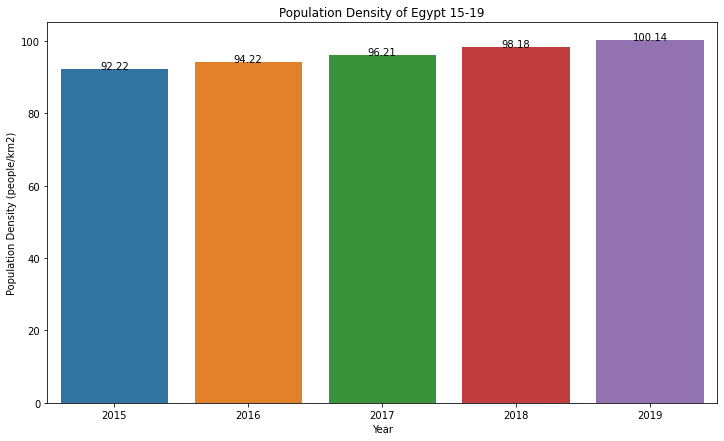

In [81]:
plt.figure(figsize=(12,7))
ax=sns.barplot(x=df_population_density.index, y=df_population_density['Egypt'])
plt.title("Population Density of Egypt 15-19")
plt.xlabel("Year")
plt.ylabel("Population Density (people/km2)")
show_values_on_bars(ax)

## New Feature 2: Calculating the growth rate of life expectancy for each country every year.

In [82]:
df_lifeExpectancyCopyFor14 = df_lifeExpectancy.copy()
df_lifeExpectancyCopyFor14['Country'] = df_lifeExpectancyCopyFor14['Country'].replace({
    'Iran (Islamic Republic of)':'Iran', 
    'Czechia':'Czech Republic',
    'Democratic Republic of the Congo':'Congo (Kinshasa)',
    'Congo':'Congo (Brazzaville)',
    'United Republic of Tanzania':'Tanzania',
    'Russian Federation':'Russia',
    'United States of America':'United States',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    "Côte d'Ivoire":'Ivory Coast',
    'Viet Nam':'Vietnam',
    'Republic of Korea':'South Korea',
    'Syrian Arab Republic':'Syria',
    "Lao People's Democratic Republic":'Laos',
    'Republic of Moldova':'Moldova',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Bolivia (Plurinational State of)':'Bolivia',
    'The former Yugoslav republic of Macedonia':'Macedonia',
    'Czechia':'Czech Republic'
    })

In [83]:
df_f2 = df_mergedThree.copy()
countries=[*df_f2['Country'].unique()]
growth_rates=[]
for country in countries:
    print(country)
    life_exp_2014 = df_lifeExpectancyCopyFor14[(df_lifeExpectancyCopyFor14['Country'] == country) & (df_lifeExpectancyCopyFor14['Year'] == 2014)]['Life_Expectancy'].item()
    life_exp_2015 = df_f2[(df_f2['Country'] == country) & (df_f2['Year'] == 2015)]['Life_Expectancy'].item()
    life_exp_2016 = df_f2[(df_f2['Country'] == country) & (df_f2['Year'] == 2016)]['Life_Expectancy'].item()
    life_exp_2017 = df_f2[(df_f2['Country'] == country) & (df_f2['Year'] == 2017)]['Life_Expectancy'].item()
    life_exp_2018 = df_f2[(df_f2['Country'] == country) & (df_f2['Year'] == 2018)]['Life_Expectancy'].item()
    life_exp_2019 = df_f2[(df_f2['Country'] == country) & (df_f2['Year'] == 2019)]['Life_Expectancy'].item()

    growth_rates.append((life_exp_2015/life_exp_2014)-1)
    growth_rates.append((life_exp_2016/life_exp_2015)-1)
    growth_rates.append((life_exp_2017/life_exp_2016)-1)
    growth_rates.append((life_exp_2018/life_exp_2017)-1)
    growth_rates.append((life_exp_2019/life_exp_2018)-1)
    

  





Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Chad
Chile
China
Colombia
Congo (Brazzaville)
Costa Rica
Croatia
Cyprus
Czech Republic
Ivory Coast
Congo (Kinshasa)
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Finland
France
Gabon
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liberia
Libya
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Mali
Malta
Mauritania
Mauritius
Mexico
Mongolia
Montenegro
Morocco
Myanmar
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
Norway
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
South Korea
Moldova
Romania
Russia
Rwanda
Saudi Arabia
Senegal
Serbia
Sierra Leone
Singapore
Slovakia
Sl

In [84]:
percentage_growth_rates = [element * 100 for element in growth_rates]

In [85]:
percentage_growth_rates


 5.586419753086402,
 0.5923620544389108,
 0.5888737895610063,
 0.5854263671276838,
 0.2789400278940146,
 3.563977746870761,
 0.4315239609357091,
 0.4296698326548887,
 0.4278315694663304,
 1.5490533562822595,
 1.944915254237345,
 0.8087960235008795,
 0.8023069964177676,
 0.7959212644272906,
 0.6339144215530945,
 -4.240157480314954,
 0.18162426751733296,
 0.18129499181636088,
 0.18096690787556824,
 0.13422818791946067,
 0.6032171581769719,
 0.32233413018771806,
 0.3212984755412762,
 0.32026945466581136,
 0.2645502645502784,
 0.43205804749339993,
 0.3558272016566333,
 0.35456556094308755,
 0.3533128353067072,
 0.24242424242424399,
 -0.5562273276904395,
 -0.029147116044869747,
 -0.02915561406551248,
 -0.029164117042923543,
 0.4411764705882337,
 0.6588579795023586,
 0.5700534759357279,
 0.5668222857933447,
 0.563627519404486,
 0.2902757619738683,
 0.2460202604920969,
 0.29106055588106194,
 0.29021585200894595,
 0.2893760368780862,
 0.13262599469494596,
 -0.7847682119205723,
 0.165105591013

In [86]:
df_mergedThree['Life_Exp_Growth_Rate'] = percentage_growth_rates
df_mergedThree.head()

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing        65.000000       263.000000   
1  Afghanistan  2016  Developing        62.020000       281.775000   
2  Afghanistan  2017  Developing        62.470147       283.270588   
3  Afghanistan  2018  Developing        62.920294       284.766176   
4  Afghanistan  2019  Developing        63.370441       286.261765   

   Infant_Deaths     Measles      Polio  Diphtheria  HIV/AIDS  ...  Region  \
0           55.0  899.000000  48.375000   65.000000       0.1  ...    Asia   
1           55.0  729.500000  61.450000   77.700000       0.1  ...    Asia   
2           55.0  719.926471  62.988235   80.686765       0.1  ...    Asia   
3           55.0  710.352941  64.526471   83.673529       0.1  ...    Asia   
4           55.0  700.779412  66.064706   86.660294       0.1  ...    Asia   

       Subregion  Population      Area  Gini  Real Growth Rating  \
0  Southern Asia    27657145  652230.0  27.8   3.1% (2013 est.).   
1  Southern Asia    27657145  652230.0  27.8   3.1% (2013 est.).   
2  Southern Asia    27657145  652230.0  27.8   3.1% (2013 est.).   
3  Southern Asia    27657145  652230.0  27.8   3.1% (2013 est.).   
4  Southern Asia    27657145  652230.0  27.8   3.1% (2013 est.).   

       Literacy Rate          Inflation      Unemployment  \
0  28.1% (2000 est.)  6.8% (2013 est.).  35% (2008 est.).   
1  28.1% (2000 est.)  6.8% (2013 est.).  35% (2008 est.).   
2  28.1% (2000 est.)  6.8% (2013 est.).  35% (2008 est.).   
3  28.1% (2000 est.)  6.8% (2013 est.).  35% (2008 est.).   
4  28.1% (2000 est.)  6.8% (2013 est.).  35% (2008 est.).   

   Life_Exp_Growth_Rate  
0              8.514190  
1             -4.584615  
2              0.725810  
3              0.720579  
4              0.715424  

[5 rows x 30 columns]

## Visualization for the Life Expectancy Growth Rate feature.

In [87]:
series_f2 = df_mergedThree.groupby(['Region'])['Life_Exp_Growth_Rate'].mean()
series_f2

Region
Africa      1.140590
Americas    0.277074
Asia        0.403200
Europe      0.309370
Oceania     0.539511
Name: Life_Exp_Growth_Rate, dtype: float64

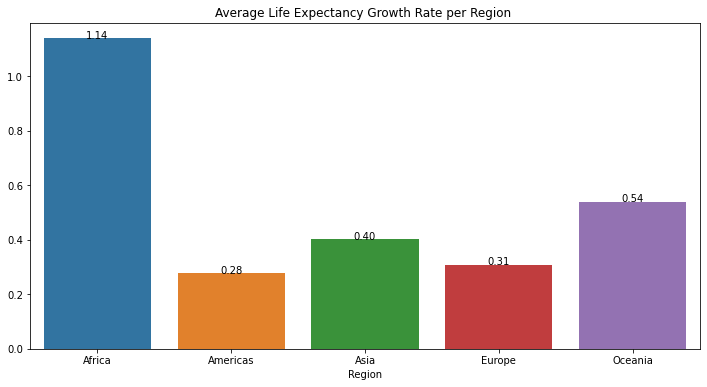

In [88]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=series_f2.index, y =series_f2.values)
plt.title("Average Life Expectancy Growth Rate per Region ")
show_values_on_bars(ax)

## New Feature 3: Calculating the population growth rate for each country every year. Then comparing the total change for each region from 2014 to 2019 with the area of the region and population growth rate.

In [89]:
df_mergedFour
df_population
df_feature3 = df_mergedFour.copy()
countriesAvailable=[*df_feature3['Country'].unique()]
population_rates=[]
for country in countriesAvailable:
    population_2014 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2014)]['Population'].item()
    population_2015 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2015)]['Population'].item()
    population_2016 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2016)]['Population'].item()
    population_2017 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2017)]['Population'].item()
    population_2018 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2018)]['Population'].item()
    population_2019 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2019)]['Population'].item()

    population_rates.append((population_2015/population_2014)-1)
    population_rates.append((population_2016/population_2015)-1)
    population_rates.append((population_2017/population_2016)-1)
    population_rates.append((population_2018/population_2017)-1)
    population_rates.append((population_2019/population_2018)-1)
    
population_rates


 0.010690331892619698,
 0.010432319600278905,
 0.010184121236730626,
 0.012759007362247443,
 0.012280706717773038,
 0.011831418254876658,
 0.011409669163161107,
 0.011039757683614315,
 0.013250226690449507,
 0.01365464199962374,
 0.013949740153180512,
 0.013961345212468279,
 0.013614745997454936,
 0.03371852027329236,
 0.0291902380475082,
 0.025734518868726353,
 0.02345538170280781,
 0.022797367636925303,
 0.005526003425222914,
 0.009322030255221936,
 0.01224309434621218,
 0.013761652214544062,
 0.013240932086577839,
 0.0158233488867634,
 0.016354962138227513,
 0.016631553348730232,
 0.016698268005636674,
 0.016448831934400276,
 0.002795365943524697,
 0.0013961886702060777,
 0.00017516423666541492,
 -0.0007647960251110364,
 -0.0012733374479819703,
 0.005525649734256177,
 0.00526387881940793,
 0.005025734264386683,
 0.004794840402513323,
 0.004573993995610648,
 -0.0014316373671154903,
 -0.0017335762709137503,
 -0.0020392324501219417,
 -0.0023571103513957414,
 -0.002687776051654489,
 0.

In [90]:
df_feature3['Population_Growth_Rate'] = population_rates
df_feature3.head()

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing        65.000000       263.000000   
1  Afghanistan  2016  Developing        62.020000       281.775000   
2  Afghanistan  2017  Developing        62.470147       283.270588   
3  Afghanistan  2018  Developing        62.920294       284.766176   
4  Afghanistan  2019  Developing        63.370441       286.261765   

   Infant_Deaths     Measles      Polio  Diphtheria  HIV/AIDS  ...  \
0           55.0  899.000000  48.375000   65.000000       0.1  ...   
1           55.0  729.500000  61.450000   77.700000       0.1  ...   
2           55.0  719.926471  62.988235   80.686765       0.1  ...   
3           55.0  710.352941  64.526471   83.673529       0.1  ...   
4           55.0  700.779412  66.064706   86.660294       0.1  ...   

       Subregion      Area  Gini  Real Growth Rating      Literacy Rate  \
0  Southern Asia  652230.0  27.8   3.1% (2013 est.).  28.1% (2000 est.)   
1  Southern Asia  652230.0  27.8   3.1% (2013 est.).  28.1% (2000 est.)   
2  Southern Asia  652230.0  27.8   3.1% (2013 est.).  28.1% (2000 est.)   
3  Southern Asia  652230.0  27.8   3.1% (2013 est.).  28.1% (2000 est.)   
4  Southern Asia  652230.0  27.8   3.1% (2013 est.).  28.1% (2000 est.)   

           Inflation      Unemployment   Population  Population_Density  \
0  6.8% (2013 est.).  35% (2008 est.).  3.44136e+07              52.763   
1  6.8% (2013 est.).  35% (2008 est.).   3.5383e+07             54.2493   
2  6.8% (2013 est.).  35% (2008 est.).  3.62961e+07             55.6493   
3  6.8% (2013 est.).  35% (2008 est.).  3.71719e+07              56.992   
4  6.8% (2013 est.).  35% (2008 est.).  3.80418e+07             58.3257   

   Population_Growth_Rate  
0                0.031249  
1                0.028170  
2                0.025806  
3                0.024130  
4                0.023400  

[5 rows x 31 columns]

In [91]:
df_feature3.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS',
       'Thinness_5-9_Years', 'Thinness_10-19_Years', 'Economy_GDP_per_Capita',
       'Family', 'Freedom', 'Generosity', 'Happiness_Rank', 'Happiness_Score',
       'Health_Life_Expectancy', 'Trust_Government_Corruption', 'Region',
       'Subregion', 'Area', 'Gini', 'Real Growth Rating', 'Literacy Rate',
       'Inflation', 'Unemployment', 'Population', 'Population_Density',
       'Population_Growth_Rate'],
      dtype='object')

In [92]:
df_population_changeLast5Years = pd.DataFrame( columns=['Country','PopulationChange'])
df_population_changeLast5Years['Country']=df_mergedFour['Country'].unique()
df_population_changeLast5Years

Country PopulationChange
0    Afghanistan              NaN
1        Albania              NaN
2        Algeria              NaN
3         Angola              NaN
4      Argentina              NaN
..           ...              ...
138    Venezuela              NaN
139      Vietnam              NaN
140        Yemen              NaN
141       Zambia              NaN
142     Zimbabwe              NaN

[143 rows x 2 columns]

In [93]:
countriesAvailable=[*df_population_changeLast5Years['Country'].unique()]
population_changes=[]
for country in countriesAvailable:
    population_2014 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2014)]['Population'].item()
    population_2019 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2019)]['Population'].item()

    population_changes.append((population_2019/population_2014)-1)
    
population_changes

[0.13997124552348228,
 -0.005315044296063887,
 0.10608876527835687,
 0.181262235414128,
 0.05026482786001463,
 0.015562750072706244,
 0.06809395626269832,
 0.03945384932801943,
 0.05702976009129768,
 0.22834904978994408,
 0.05519630040334933,
 0.0021912176987028964,
 0.02834815271951152,
 0.14720868091743244,
 0.06124861449712338,
 0.07533589121466866,
 -0.052011053081095215,
 0.10297904979318862,
 0.040864184279414406,
 -0.033886686187350024,
 0.15554131066200338,
 0.17129464042190512,
 0.07935025852881927,
 0.14084096215595787,
 0.048976094831761685,
 0.16711015765874238,
 0.06718103962003652,
 0.024530800465072167,
 0.07178841138206749,
 0.1358547086583921,
 0.052586129595298736,
 -0.029425089965545936,
 0.04016065302608607,
 0.009263340252347652,
 0.13550540647179976,
 0.17654295875368864,
 0.019010278417124882,
 0.05644512808526203,
 0.08913239557688413,
 0.11018462351445968,
 0.025166462169768256,
 0.0071231423876354505,
 0.1425614753580291,
 0.012954346954358043,
 0.014583723754

In [94]:
df_population_changeLast5Years['PopulationChange'] = population_changes
df_population_changeLast5Years.head()

Country  PopulationChange
0  Afghanistan          0.139971
1      Albania         -0.005315
2      Algeria          0.106089
3       Angola          0.181262
4    Argentina          0.050265

In [120]:
totalPopulationGrowthinRegions=[]
totalPopulationInRegions=[]
averagePopulationChangePerRegion=[]
totalPopulationInRegionsAfter=[]
totalRegionArea=[]
year=[2014,2019]*5
regionsAvailable=[*df_feature3['Region'].unique()]
for region in regionsAvailable:
    
    countriesInRegion=[*df_feature3[df_feature3['Region']==region]['Country'].unique()]
    totalRegionArea+=[((df_feature3[df_feature3['Region']==region]['Area']).sum()/1000)]
    totalPopulation=0
    totalPopulationGrowth=0
    for country in countriesInRegion:
        totalPopulationGrowth=totalPopulationGrowth+(df_feature3[df_feature3['Country']==country]['Population_Growth_Rate']*df_feature3[df_feature3['Country']==country]['Population']).sum()
        totalPopulation=totalPopulation+(df_feature3[df_feature3['Country']==country]['Population']).sum()
    totalPopulation=totalPopulation-totalPopulationGrowth
    totalPopulationGrowthinRegions+=[totalPopulationGrowth/1000000]
    totalPopulationInRegions+=[totalPopulation/1000000]
    totalPopulation=totalPopulation+totalPopulationGrowth
    totalPopulationInRegionsAfter+=[totalPopulation/1000000]

    averagePopulationChangePerRegion=averagePopulationChangePerRegion+[(totalPopulationGrowth/totalPopulation)]
display(regionsAvailable,totalRegionArea,totalPopulationInRegions,totalPopulationGrowthinRegions,averagePopulationChangePerRegion)

['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']

[156699.335, 115614.69, 131353.96, 197644.38, 39812.455]

[21996.679856324587,
 3724.1610401917023,
 5685.518100039898,
 4849.966269362301,
 144.53752599773168]

[210.88279467541477,
 5.470313808297398,
 151.07190796010198,
 43.4810576376991,
 1.8456690022683286]

[0.009495990081825516,
 0.001466717026182904,
 0.02588359089006308,
 0.008885567726005504,
 0.012608476008932095]

In [122]:
df_population_trend_regionBase = pd.DataFrame( columns=['Region','Area(thousand-km2)','TotalPopulation2014(millions)','TotalPopulation2019(millions)','PopulationDifference(millions)','AveragePopulationChange'])
df_population_trend_regionBase['Region']=regionsAvailable
df_population_trend_regionBase['Area(thousand-km2)']=totalRegionArea

df_population_trend_regionBase['TotalPopulation2014(millions)']=totalPopulationInRegions
df_population_trend_regionBase['TotalPopulation2019(millions)']=totalPopulationInRegionsAfter
df_population_trend_regionBase['PopulationDifference(millions)']=totalPopulationGrowthinRegions
df_population_trend_regionBase['AveragePopulationChange']=averagePopulationChangePerRegion
display(df_population_trend_regionBase)

Region  Area(thousand-km2)  TotalPopulation2014(millions)  \
0      Asia          156699.335                   21996.679856   
1    Europe          115614.690                    3724.161040   
2    Africa          131353.960                    5685.518100   
3  Americas          197644.380                    4849.966269   
4   Oceania           39812.455                     144.537526   

   TotalPopulation2019(millions)  PopulationDifference(millions)  \
0                   22207.562651                      210.882795   
1                    3729.631354                        5.470314   
2                    5836.590008                      151.071908   
3                    4893.447327                       43.481058   
4                     146.383195                        1.845669   

   AveragePopulationChange  
0                 0.009496  
1                 0.001467  
2                 0.025884  
3                 0.008886  
4                 0.012608

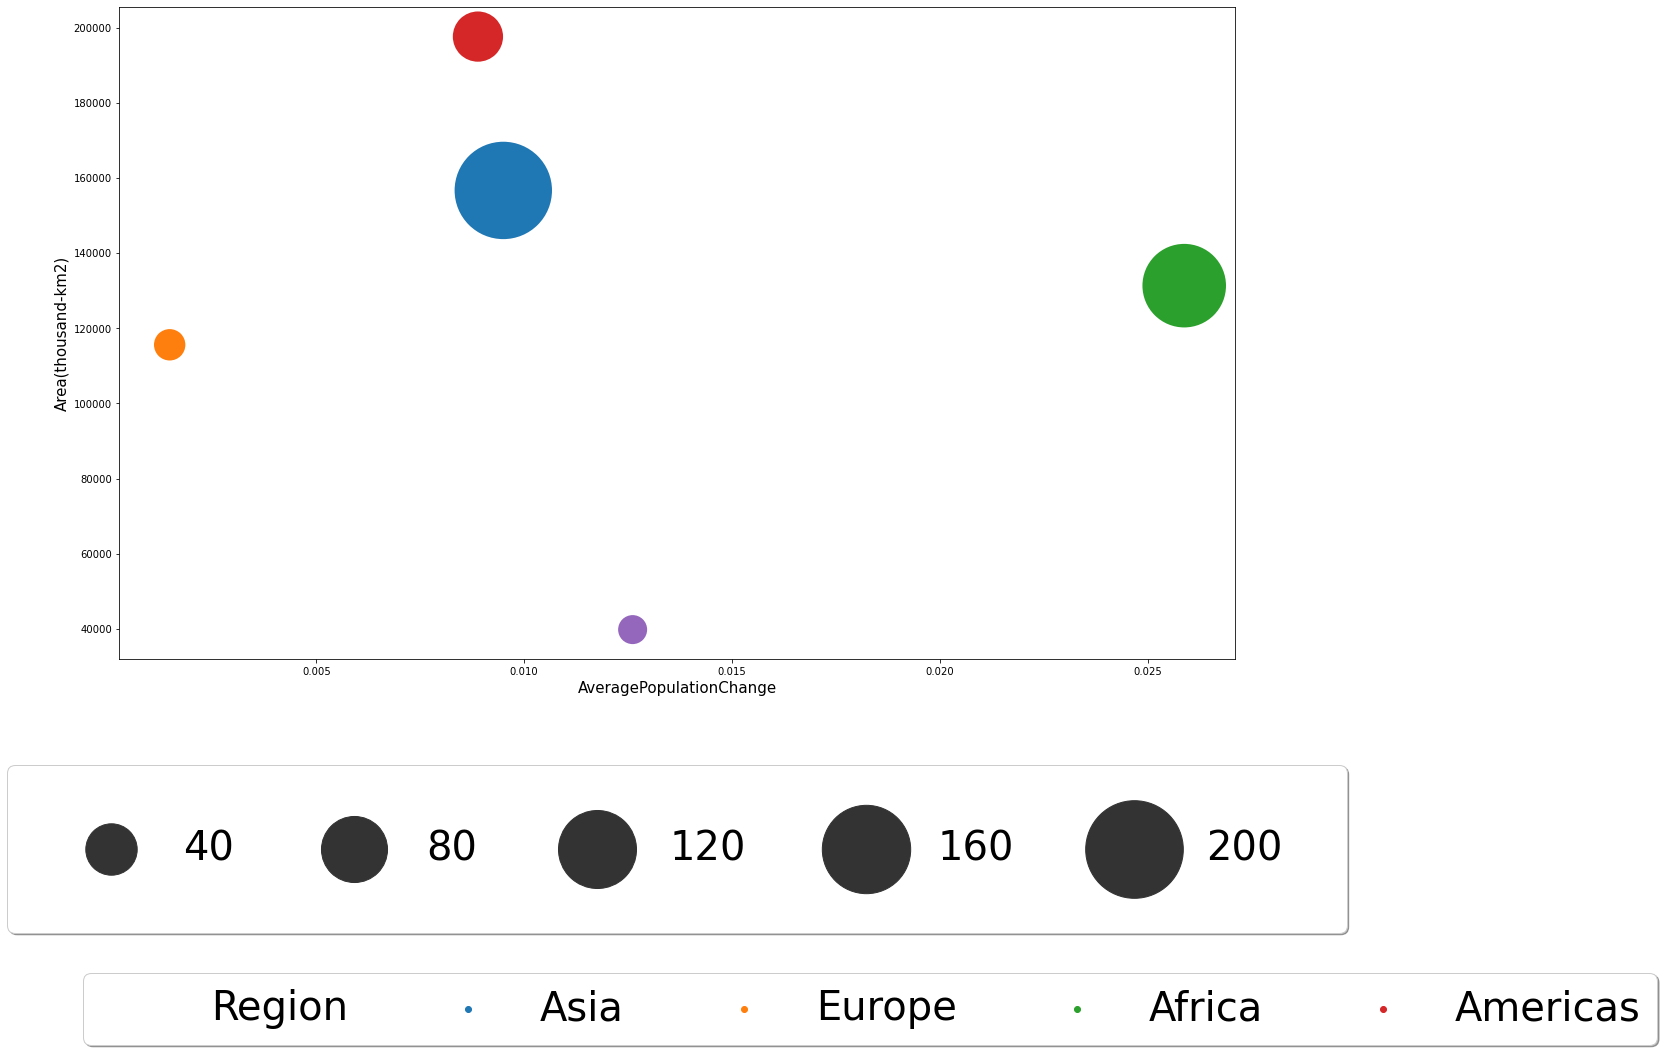

In [177]:

plt.figure(figsize=(20,12))
# plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.rc('legend', loc="upper right") 
ax=sns.scatterplot(
    x="AveragePopulationChange",
    y="Area(thousand-km2)",
    size="PopulationDifference(millions)",
    hue="Region",
    data=df_population_trend_regionBase,
    sizes=(1000, 10000),
    legend='brief',
    

)
plt.rcParams["axes.labelsize"] = 15
h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend(h[:5], l[:5], loc='upper left', 
                     bbox_to_anchor=(-0.05, -0.45),prop={'size': 40}, fancybox=True, shadow=True, ncol=5)
size_lgd = plt.legend(h[-5:], l[-5:], loc='lower center', borderpad=1.6, prop={'size': 40},
                      bbox_to_anchor=(0.5,-0.45), fancybox=True, shadow=True, ncol=5)
plt.gca().add_artist(col_lgd)



plt.show()


In [103]:
from collections.abc import Sequence


def get_shape(lst, shape=()):
    """
    returns the shape of nested lists similarly to numpy's shape.

    :param lst: the nested list
    :param shape: the shape up to the current recursion depth
    :return: the shape including the current depth
            (finally this will be the full depth)
    """

    if not isinstance(lst, Sequence):
        # base case
        return shape

    # peek ahead and assure all lists in the next depth
    # have the same length
    if isinstance(lst[0], Sequence):
        l = len(lst[0])
        if not all(len(item) == l for item in lst):
            msg = 'not all lists have the same length'
            raise ValueError(msg)

    shape += (len(lst), )

    # recurse
    shape = get_shape(lst[0], shape)

    return shape

print(get_shape(totalPopulationInRegions))

# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------

In [76]:
model = LinearRegression()
years = np.flip(np.array([*df_lifeExpectancy.groupby(['Year']).groups.keys()]).reshape(-1, 1))
allCountries = [*df_lifeExpectancy.groupby(['Country']).groups.keys()]
years_predict = np.array([2016, 2017, 2018, 2019]).reshape(-1, 1)
for country in allCountries:
    for columnName, columnData in df_lifeExpectancy.iteritems():
        if(columnName == 'Country' or columnName == 'Year' or columnName == 'Status'):
            continue
        x_train = np.array(df_lifeExpectancy[df_lifeExpectancy['Country'] == country][columnName]).reshape(-1, 1)
        model.fit(years, x_train)
        x_predict = model.predict(years_predict)
        print(x_predict)

.2575    ]
 [52.98044118]
 [53.70338235]
 [54.42632353]]
[[322.425     ]
 [318.26176471]
 [314.09852941]
 [309.93529412]]
[[22.975     ]
 [22.43529412]
 [21.89558824]
 [21.35588235]]
[[480.775     ]
 [487.02058824]
 [493.26617647]
 [499.51176471]]
[[ 98.075     ]
 [101.17205882]
 [104.26911765]
 [107.36617647]]
[[ 99.025     ]
 [102.18970588]
 [105.35441176]
 [108.51911765]]
[[0.875     ]
 [0.79926471]
 [0.72352941]
 [0.64779412]]
[[ 9.6675    ]
 [ 9.96955882]
 [10.27161765]
 [10.57367647]]
[[9.15      ]
 [9.32279412]
 [9.49558824]
 [9.66838235]]
[[83.95      ]
 [84.24117647]
 [84.53235294]
 [84.82352941]]
[[44.175     ]
 [42.07794118]
 [39.98088235]
 [37.88382353]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-10.625     ]
 [-21.96323529]
 [-33.30147059]
 [-44.63970588]]
[[96.6       ]
 [96.65588235]
 [96.71176471]
 [96.76764706]]
[[96.5       ]
 [96.53676471]
 [96.57352941]
 [96.61029412]]
[[0.1]
 [0.1]
 [0.1]
 [0.1]]
[[2.1975    ]
 [2.21264706]
 [2.22779412]
 [2.24294118]]
[[2.185     ]
 [2.19205882]

### Code to impute the values of alcohol using the mean value of alcohol consumption per developing/developed.

In [77]:
df_intermediate = df_lifeExpectancy.copy()
averageOfDeveloping = df_intermediate[df_intermediate['Status'] == 'Developing']['Alcohol'].mean()
averageOfDeveloped = df_intermediate[df_intermediate['Status'] == 'Developed']['Alcohol'].mean()
print('Mean alcohol consumption of developing:', averageOfDeveloping)
print('Mean alcohol consumption of developed:', averageOfDeveloped)

df_intermediate['Alcohol'] = df_intermediate.apply(
    lambda row: averageOfDeveloping if (np.isnan(row['Alcohol']) and row['Status'] == 'Developing') else row['Alcohol'], axis=1
)
df_intermediate['Alcohol'] = df_intermediate.apply(
    lambda row: averageOfDeveloped if (np.isnan(row['Alcohol']) and row['Status'] == 'Developed') else row['Alcohol'], axis=1
)
df_intermediate.isna().sum()

KeyError: 'Alcohol'

In [225]:
pd.merge(df_countryData, df_happiness, on='Country', how='inner')

Country  Region       Subregion  Population      Area  Gini  \
0    Afghanistan    Asia   Southern Asia    27657145  652230.0  27.8   
1    Afghanistan    Asia   Southern Asia    27657145  652230.0  27.8   
2    Afghanistan    Asia   Southern Asia    27657145  652230.0  27.8   
3    Afghanistan    Asia   Southern Asia    27657145  652230.0  27.8   
4    Afghanistan    Asia   Southern Asia    27657145  652230.0  27.8   
..           ...     ...             ...         ...       ...   ...   
720     Zimbabwe  Africa  Eastern Africa    14240168  390757.0   NaN   
721     Zimbabwe  Africa  Eastern Africa    14240168  390757.0   NaN   
722     Zimbabwe  Africa  Eastern Africa    14240168  390757.0   NaN   
723     Zimbabwe  Africa  Eastern Africa    14240168  390757.0   NaN   
724     Zimbabwe  Africa  Eastern Africa    14240168  390757.0   NaN   

    Real Growth Rating      Literacy Rate          Inflation  \
0    3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
1    3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
2    3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
3    3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
4    3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
..                 ...                ...                ...   
720                NaN                NaN                NaN   
721                NaN                NaN                NaN   
722                NaN                NaN                NaN   
723                NaN                NaN                NaN   
724                NaN                NaN                NaN   

         Unemployment  Economy_GDP_per_Capita    Family   Freedom  Generosity  \
0    35% (2008 est.).                0.319820  0.302850  0.234140    0.365100   
1    35% (2008 est.).                0.382270  0.110370  0.164300    0.312680   
2    35% (2008 est.).                0.401477  0.581543  0.106180    0.311871   
3    35% (2008 est.).                0.332000  0.537000  0.085000    0.191000   
4    35% (2008 est.).                0.319820  0.302850  0.234140    0.365100   
..                ...                     ...       ...       ...         ...   
720               NaN                0.271000  1.032760  0.258610    0.189870   
721               NaN                0.350410  0.714780  0.254290    0.185030   
722               NaN                0.375847  1.083096  0.336384    0.189143   
723               NaN                0.357000  1.094000  0.406000    0.132000   
724               NaN                0.271000  1.032760  0.258610    0.189870   

     Happiness_Rank  Happiness_Score  Health_Life_Expectancy  \
0               153            3.575                0.303350   
1               154            3.360                0.173440   
2               141            3.794                0.180747   
3               145            3.632                0.255000   
4               153            3.575                0.303350   
..              ...              ...                     ...   
720             115            4.610                0.334750   
721             131            4.193                0.159500   
722             138            3.875                0.196764   
723             144            3.692                0.248000   
724             115            4.610                0.334750   

     Trust_Government_Corruption  Year  
0                       0.097190  2015  
1                       0.071120  2016  
2                       0.061158  2017  
3                       0.036000  2018  
4                       0.097190  2019  
..                           ...   ...  
720                     0.080790  2015  
721                     0.085820  2016  
722                     0.095375  2017  
723                     0.099000  2018  
724                     0.080790  2019  

[725 rows x 19 columns]

In [29]:
df_integrated = pd.merge(
    pd.merge(df_countryData, df_happiness, on='Country', how='inner'), 
        df_lifeExpectancy, on='Country', how='inner')

In [106]:
model = LinearRegression()
years = np.flip(np.array([*df_lifeExpectancy.groupby(['Year']).groups.keys()]).reshape(-1, 1))
allCountries = [*df_integrated.groupby(['Country']).groups.keys()]
years_predict = np.array([2016, 2017, 2018, 2019]).reshape(-1, 1)
for country in allCountries:
    for columnName, columnData in df_lifeExpectancy.iteritems():
        if(columnName == 'Country' or columnName == 'Year' or columnName == 'Status'):
            continue
        x_train = np.array(df_lifeExpectancy[df_lifeExpectancy['Country'] == country][columnName]).reshape(-1, 1)
        model.fit(years, x_train)
        x_predict = model.predict(years_predict)
        print(x_predict)

[[62.02      ]
 [62.47014706]
 [62.92029412]
 [63.37044118]]
[[281.775     ]
 [283.27058824]
 [284.76617647]
 [286.26176471]]
[[62.05      ]
 [60.14411765]
 [58.23823529]
 [56.33235294]]
[[0.01225]
 [0.012  ]
 [0.01175]
 [0.0115 ]]
[[77.74084862]
 [82.77387668]
 [87.80690474]
 [92.83993281]]
[[65.25      ]
 [65.33088235]
 [65.41176471]
 [65.49264706]]
[[ 255.625     ]
 [   7.78676471]
 [-240.05147059]
 [-487.88970588]]
[[19.4775    ]
 [19.94323529]
 [20.40897059]
 [20.87470588]]
[[83.175     ]
 [80.30588235]
 [77.43676471]
 [74.56764706]]
[[61.45      ]
 [62.98823529]
 [64.52647059]
 [66.06470588]]
[[8.36925   ]
 [8.38298529]
 [8.39672059]
 [8.41045588]]
[[77.7       ]
 [80.68676471]
 [83.67352941]
 [86.66029412]]
[[0.1]
 [0.1]
 [0.1]
 [0.1]]
[[648.53423281]
 [684.83056309]
 [721.12689336]
 [757.42322364]]
[[15233957.02499986]
 [15852980.22647047]
 [16472003.42794108]
 [17091026.6294117 ]]
[[21.1775    ]
 [21.71823529]
 [22.25897059]
 [22.79970588]]
[[22.5025    ]
 [23.31676471]
 [24.1

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

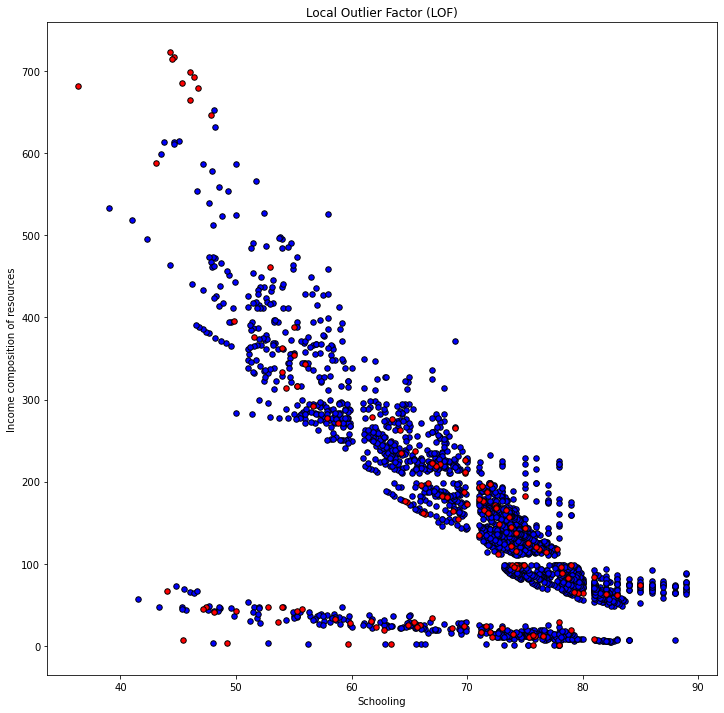

In [213]:
# A visualization of the outliers
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in yhat]
out_mask = [True if l == -1 else False for l in yhat]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Schooling');
plt.ylabel('Income composition of resources');
plt.show()

In [214]:
from sklearn.neighbors import LocalOutlierFactor
X = df_lifeExpectancy[df_lifeExpectancy.columns[3:]].values

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
mask = yhat != -1
X_filtered = X[mask, :]

# summarize the shape of the updated dataset
print(X.shape)
print(X_filtered.shape)

[ 1  1  1 ...  1 -1 -1]
(2288, 9)
(2153, 9)


In [ ]:
sns.scatterplot(x=df_lifeExpectancy['Year'], y=df_lifeExpectancy['Schooling'], hue=df_lifeExpectancy['Status'])
sns.scatterplot(x=df_lifeExpectancy['Year'], y=df_lifeExpectancy['Income_Composition_of_Resources'], hue=df_lifeExpectancy['Status'])

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_lifeExpectancy[np.isnan(df_lifeExpectancy['Schooling']) & np.isnan(df_lifeExpectancy['Income_Composition_of_Resources'])][['Year', 'Country', 'Status', 'Schooling']])

In [ ]:
# USING THE MEAN OF EVERY COLUMN COLLECTIVELY
df_lifeExpectancy_copy = df_lifeExpectancy.copy()

# Method to replace the outliers with a value, also takes as a parameter the condition on which to replace (right outlier or left)
def replaceConditional(df, col, compareTo, valueToReplace, right):
    if right:
        df[col] = df.apply(lambda row: valueToReplace if (row[col] > compareTo) else row[col], axis=1)
    else:
        df[col] = df.apply(lambda row: valueToReplace if (row[col] < compareTo) else row[col], axis=1)

# Removing outliers from the left and from the right.
for col in df_lifeExpectancy_copy.columns[3:]:
    maxValue = (IQR[col] * 1.5) + Q3[col]
    minValue = Q1[col] - (IQR[col] * 1.5)
    mean = df_lifeExpectancy_copy[col].mean()
    replaceConditional(df_lifeExpectancy_copy, col, maxValue, mean, True)
    replaceConditional(df_lifeExpectancy_copy, col, minValue, mean, False)
drawInterpolatedMultipleBoxPlots(df_lifeExpectancy, df_lifeExpectancy_copy, df_lifeExpectancy.columns[3:], 30, 70)
df_lifeExpectancy_copy.describe()


In [ ]:
# function to do absolute scaling to a df, given cols.
def maximum_absolute_scaling(df, cols):
    for column in cols:
        df[column] = df[column]  / df[column].abs().max()